<a href="https://colab.research.google.com/github/tahiel53/proyectoDSII/blob/main/preentrega_DSII_Tahiel_Maccario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Influencia de las condiciones ambientales en el florecimiento de cianobacterias

Las cianobacterias son microorganismos fotosintéticos que habitan en el agua y son esenciales para la configuración de los ecosistemas, ya que aumentan la disponibilidad de oxígeno.

Ciertas condiciones como la temperatura y el exceso de nutrientes pueden producir un crecimiento de cianobacterias desmedido, conocido como "floraciones". En algunos casos, estas floraciones pueden venir acompañadas por la producción de cianotoxinas, que son compuestos tóxicos capaces de dañar órganos y afectar múltiples sistemas biológicos.

Por esta razón, el monitoreo de las floraciones en fuentes de agua naturales y el estudio de las variables que las afectan es fundamental. A través del análisis de datos ambientales, este proyecto busca identificar patrones y factores que contribuyan al florecimiento de cianobacterias, lo que puede ayudar a desarrollar estrategias de gestión para mitigar su impacto en la salud pública y la calidad del agua.

### Audiencia

Este proyecto tiene como objetivo analizar las variables ambientales que afectan el florecimiento de cianobacterias, lo que puede ser de gran utilidad para organismos reguladores en el monitoreo y la gestión de la calidad del agua.

## Preguntas

### Preguntas principales:
¿Cómo influye la disponibilidad de nutrientes en los florecimientos de cianobacterias?

¿Tiene la temperatura un impacto significativo en el crecimiento de las cianobacterias?
### Preguntas secundarias:
¿Cual fue la tendencia de aparición de floraciones?

¿Existen diferencias en la concentración de cianobacterias entre distintos cuerpos de agua y tipos de ambiente?

¿Qué nutrientes tienen mayor impacto en la aparición de florecimientos?

¿Es más relevante la temperatura bajo el agua que en la superficie para el crecimiento de cianobacterias?

## Datos disponibles

Se dispone de un dataset con 640 muestreos en distintos embalses en Estados Unidos. Las mediciones realizadas incluyen la concentración máxima de cianobacterias (variable de interes) y condiciones del ambiente como nutrientes del agua, temperatura y precipitaciones en los meses de verano.

### Variables de la tabla que seran usadas:

* Reservoir: Iniciales del nombre del embalse
* Reservoir_type: Tipo de ambiente según la vegetación
  * 1 = boscoso con estratificación
  * 2 = agrícola con estratificación
  * 3 = estratificación debil o no estratificado
* Year: Año del muestreo
* Cyanobacteria_Max_cells/ml: concentración máxima de cianobacterias (células/ml)
* TP_ppb = Fósforo total (ppm)
* P_dissolved_ppb = Fosforo disuleto (ppb)
* TKN_ppm = Nitrógeno total de Kjeldahl (ppm)
* NH3_ppm = Amoníaco total (ppm)
* NOx_ppm = Nitritos y nitratos totales (ppm)
* TOC_ppm = Carbono orgánico total (ppm)
* Alcalinity_ppm = Alcalinidad (ppm)
* Summer_precip_inches = Precipitaciones totales durante el verano
* ST_Celsius = Temperatura (ºC) en la superficie (para Mayo, Junio, Julio y Agosto)
* DT_Celsius = Temperatura (ºC) en la profundidad (para Mayo, Junio, Julio y Agosto)
* DO_mg/l = Oxígeno disuelto en la profundidad (mg/l)

Además de las mediciones en los embalses, se tiene un promedio de mediciones de los afluentes que desembocan en cada embalse ("6to8inflow"). Estas variables representan un promedio entre los meses de Junio a Agosto:
* NH36to8inflow_ppm = Amoníaco total (ppm)
* TKN6to8inflow_ppm = Nitrógeno total de Kjeldahl (ppm)
* NOx6to8inflow_ppm = Nitritos y nitratos totales (ppm)
* TP6to8inflow_ppb = Fósforo total (ppm)
* TOC6to8inflow_ppm = Carbono orgánico total (ppm)

# Importación de los datos
Los datos fueron cargados en un repositorio de github para acceder fácilmente desde Google Collab

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar el archivo Excel
file_path = 'https://github.com/tahiel53/proyectoDSII/raw/refs/heads/main/CyanoMaxCD_environmental_vars_FINAL.xlsx'

In [3]:
# Leer la segunda hoja del archivo (índice 1)
data = pd.read_excel(file_path, sheet_name=1)

In [4]:
data.head()

,Reservoir,Reservoir_type,Year,Cyanobacteria_Max_cells/ml,logCyanoMax_cells/ml,Chlorophyll_a_ug/l,Secchi_cm,TP_ppb,P_dissolved_ppb,TKN_ppm,...,mayST_Celsius,junST_Celsius,julST_Celsius,augST_Celsius,mayDO_mg/l,junDO_mg/l,mayDT_Celsius,junDT_Celsius,julDT_Celsius,augDT_Celsius
0,BHR,1,1987,na,na,na,162,5,5,0.125,...,na,na,na,na,na,na,na,na,na,na
1,BHR,1,1988,235.616384,2.372205,na,na,5,32.5,0.05,...,na,na,na,na,na,na,na,na,na,na
2,BHR,1,1989,na,na,na,na,12,7.5,0.2,...,18.56945,24.6643,27.1132,26.83358,8.488579,6.277267,12.946836,17.037883,20.765282,22.331586
3,BHR,1,1990,na,na,2,116,115,115,0.075,...,20.34055,24.5,27.8436,26.9803,7.503207,4.352679,14.655307,17.616071,20.855864,21.938536
4,BHR,1,1991,na,na,na,103,35.5,10,0.133333,...,23.826517,26.6232,28.385333,27.56425,na,3.833392,16.090436,21.098133,23.554757,25.351131


In [5]:
# Revisar valores faltantes
print(data.isnull().sum())

Reservoir                     0
Reservoir_type                0
Year                          0
Cyanobacteria_Max_cells/ml    0
logCyanoMax_cells/ml          0
Chlorophyll_a_ug/l            0
Secchi_cm                     0
TP_ppb                        0
P_dissolved_ppb               0
TKN_ppm                       0
NH3_ppm                       0
NOx_ppm                       0
TOC_ppm                       0
Alkalinity_ppm                0
NH36to8inflow_ppm             0
TKN6to8inflow_ppm             0
NOx6to8inflow_ppm             0
TP6to8inflow_ppb              0
TOC6to8inflow_ppm             0
Summer_precip_inches          0
Summer_precip_Z-score         0
mayST_Celsius                 0
junST_Celsius                 0
julST_Celsius                 0
augST_Celsius                 0
mayDO_mg/l                    0
junDO_mg/l                    0
mayDT_Celsius                 0
junDT_Celsius                 0
julDT_Celsius                 0
augDT_Celsius                 0
dtype: i

No aparecen valores nulos porque estan escritos con "na"

In [6]:
# Guardar como CSV
data.to_csv('datos.csv', index=False)

In [7]:
# Creo dataframe reconociendo valores 'na' como nulos
df = pd.read_csv('datos.csv', na_values=['na'])

In [8]:
df.head()

,Reservoir,Reservoir_type,Year,Cyanobacteria_Max_cells/ml,logCyanoMax_cells/ml,Chlorophyll_a_ug/l,Secchi_cm,TP_ppb,P_dissolved_ppb,TKN_ppm,...,mayST_Celsius,junST_Celsius,julST_Celsius,augST_Celsius,mayDO_mg/l,junDO_mg/l,mayDT_Celsius,junDT_Celsius,julDT_Celsius,augDT_Celsius
0,BHR,1,1987,NaN,NaN,NaN,162.0,5.0,5.0,0.125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BHR,1,1988,235.616384,2.372205,NaN,NaN,5.0,32.5,0.050000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BHR,1,1989,NaN,NaN,NaN,NaN,12.0,7.5,0.200000,...,18.569450,24.6643,27.113200,26.83358,8.488579,6.277267,12.946836,17.03788333333333,20.765282,22.331586
3,BHR,1,1990,NaN,NaN,2.0,116.0,115.0,115.0,0.075000,...,20.340550,24.5000,27.843600,26.98030,7.503207,4.352679,14.655307,17.616071428571427,20.855864,21.938536
4,BHR,1,1991,NaN,NaN,NaN,103.0,35.5,10.0,0.133333,...,23.826517,26.6232,28.385333,27.56425,NaN,3.833392,16.090436,21.098133333333333,23.554757,25.351131


In [9]:
# Revisar valores faltantes
print(df.isnull().sum())

Reservoir                       0
Reservoir_type                  0
Year                            0
Cyanobacteria_Max_cells/ml    216
logCyanoMax_cells/ml          216
Chlorophyll_a_ug/l            373
Secchi_cm                      74
TP_ppb                        334
P_dissolved_ppb               489
TKN_ppm                       341
NH3_ppm                       330
NOx_ppm                       329
TOC_ppm                       218
Alkalinity_ppm                262
NH36to8inflow_ppm             387
TKN6to8inflow_ppm             398
NOx6to8inflow_ppm             336
TP6to8inflow_ppb              382
TOC6to8inflow_ppm             280
Summer_precip_inches            0
Summer_precip_Z-score           0
mayST_Celsius                 145
junST_Celsius                 135
julST_Celsius                 121
augST_Celsius                 108
mayDO_mg/l                    195
junDO_mg/l                    188
mayDT_Celsius                 191
junDT_Celsius                 182
julDT_Celsius 

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Reservoir                   640 non-null    object 
 1   Reservoir_type              640 non-null    int64  
 2   Year                        640 non-null    int64  
 3   Cyanobacteria_Max_cells/ml  424 non-null    float64
 4   logCyanoMax_cells/ml        424 non-null    float64
 5   Chlorophyll_a_ug/l          267 non-null    float64
 6   Secchi_cm                   566 non-null    float64
 7   TP_ppb                      306 non-null    float64
 8   P_dissolved_ppb             151 non-null    float64
 9   TKN_ppm                     299 non-null    float64
 10  NH3_ppm                     310 non-null    float64
 11  NOx_ppm                     311 non-null    float64
 12  TOC_ppm                     422 non-null    float64
 13  Alkalinity_ppm              378 non

La columna 'junDT_Celsius' aparece como object cuando deberia tener valores numéricos

In [11]:
np.float64(df['junDT_Celsius'])

ValueError: could not convert string to float: ' '

Hay alguna celda con un espacio

In [12]:
columna_con_espacios = df['junDT_Celsius']

filas_con_espacios = df[columna_con_espacios == ' ']

print(filas_con_espacios)

    Reservoir  Reservoir_type  Year  Cyanobacteria_Max_cells/ml  \
128       CCK               2  1987                     403.283   

     logCyanoMax_cells/ml  Chlorophyll_a_ug/l  Secchi_cm  TP_ppb  \
128               2.60561                 9.2       52.5     5.0   

     P_dissolved_ppb   TKN_ppm  ...  mayST_Celsius  junST_Celsius  \
128              5.0  0.333333  ...            NaN            NaN   

     julST_Celsius  augST_Celsius  mayDO_mg/l  junDO_mg/l  mayDT_Celsius  \
128            NaN            NaN         NaN         NaN            NaN   

     junDT_Celsius  julDT_Celsius  augDT_Celsius  
128                           NaN            NaN  

[1 rows x 31 columns]


In [13]:
columna_con_espacios.iloc[128]

' '

In [14]:
df.loc[128, 'junDT_Celsius'] = np.nan

In [15]:
df['junDT_Celsius'].iloc[128]

nan

Ahora deberia poder pasarse a float64

In [16]:
df['junDT_Celsius'] = np.float64(df['junDT_Celsius'])

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Reservoir                   640 non-null    object 
 1   Reservoir_type              640 non-null    int64  
 2   Year                        640 non-null    int64  
 3   Cyanobacteria_Max_cells/ml  424 non-null    float64
 4   logCyanoMax_cells/ml        424 non-null    float64
 5   Chlorophyll_a_ug/l          267 non-null    float64
 6   Secchi_cm                   566 non-null    float64
 7   TP_ppb                      306 non-null    float64
 8   P_dissolved_ppb             151 non-null    float64
 9   TKN_ppm                     299 non-null    float64
 10  NH3_ppm                     310 non-null    float64
 11  NOx_ppm                     311 non-null    float64
 12  TOC_ppm                     422 non-null    float64
 13  Alkalinity_ppm              378 non

# Tratamiento de nulos

In [18]:
# Eliminar filas donde 'Cyanobacteria_Max_cells/ml' tiene valores nulos (es la variable de interés)
df = df.dropna(subset=['Cyanobacteria_Max_cells/ml'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 1 to 639
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Reservoir                   424 non-null    object 
 1   Reservoir_type              424 non-null    int64  
 2   Year                        424 non-null    int64  
 3   Cyanobacteria_Max_cells/ml  424 non-null    float64
 4   logCyanoMax_cells/ml        424 non-null    float64
 5   Chlorophyll_a_ug/l          167 non-null    float64
 6   Secchi_cm                   401 non-null    float64
 7   TP_ppb                      210 non-null    float64
 8   P_dissolved_ppb             83 non-null     float64
 9   TKN_ppm                     210 non-null    float64
 10  NH3_ppm                     210 non-null    float64
 11  NOx_ppm                     210 non-null    float64
 12  TOC_ppm                     268 non-null    float64
 13  Alkalinity_ppm              260 non-null

In [19]:
print(df.columns)

Index(['Reservoir', 'Reservoir_type', 'Year', 'Cyanobacteria_Max_cells/ml',
       'logCyanoMax_cells/ml', 'Chlorophyll_a_ug/l', 'Secchi_cm', 'TP_ppb',
       'P_dissolved_ppb', 'TKN_ppm', 'NH3_ppm', 'NOx_ppm', 'TOC_ppm',
       'Alkalinity_ppm', 'NH36to8inflow_ppm', 'TKN6to8inflow_ppm',
       'NOx6to8inflow_ppm', 'TP6to8inflow_ppb', 'TOC6to8inflow_ppm',
       'Summer_precip_inches', 'Summer_precip_Z-score', 'mayST_Celsius',
       'junST_Celsius', 'julST_Celsius', 'augST_Celsius', 'mayDO_mg/l',
       'junDO_mg/l', 'mayDT_Celsius', 'junDT_Celsius', 'julDT_Celsius',
       'augDT_Celsius'],
      dtype='object')


### Embalses
Observo si hay algun embalse con muchos nulos para quitarlo

In [20]:

nulos_por_embalse = df.groupby('Reservoir').apply(lambda x: x.isna().sum())

print(nulos_por_embalse)

           Reservoir  Reservoir_type  Year  Cyanobacteria_Max_cells/ml  \
Reservoir                                                                
BHR                0               0     0                           0   
BRR                0               0     0                           0   
BVR                0               0     0                           0   
CBR                0               0     0                           0   
CCK                0               0     0                           0   
CFK                0               0     0                           0   
CHL                0               0     0                           0   
CMR                0               0     0                           0   
CRR                0               0     0                           0   
EFR                0               0     0                           0   
GRR                0               0     0                           0   
HTR                0               0  

<ipython-input-20-146a527285ee>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nulos_por_embalse = df.groupby('Reservoir').apply(lambda x: x.isna().sum())


Los embalses WFR y HTR no tienen información de la temperatura y oxigeno disuelto bajo el agua por lo tanto los saco de la tabla

In [21]:
# Eliminar filas específicas con 'drop'
df = df[df['Reservoir'].isin(['WFR', 'HTR']) == False]

### Temperaturas

Primero hago columnas de temperatura promedio entre los cuatro meses que voy a usar como variables

In [22]:
# Crear la columna con el promedio de las temperaturas de mayo, junio, julio y agosto (en superficie)
df['meanST_Celsius'] = df[['mayST_Celsius', 'junST_Celsius', 'julST_Celsius', 'augST_Celsius']].mean(axis=1)

<ipython-input-22-64e82f2f864f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['meanST_Celsius'] = df[['mayST_Celsius', 'junST_Celsius', 'julST_Celsius', 'augST_Celsius']].mean(axis=1)


In [23]:
# Mostrar las primeras filas para verificar
print(df[['mayST_Celsius', 'junST_Celsius', 'julST_Celsius', 'augST_Celsius', 'meanST_Celsius']].head())


    mayST_Celsius  junST_Celsius  julST_Celsius  augST_Celsius  meanST_Celsius
1             NaN            NaN            NaN            NaN             NaN
5       20.267183       23.26970      27.764800       26.21610       24.379446
6       21.356100       25.41624      30.903000       28.01782       26.423290
8       19.067525       25.46340      28.596300       29.42930       25.639131
11      20.747250       27.01420      28.603867       28.19990       26.141304


In [24]:
# Crear la columna con el promedio de las temperaturas de mayo, junio, julio y agosto (en profundidad)
df['meanDT_Celsius'] = df[['mayDT_Celsius', 'junDT_Celsius', 'julDT_Celsius', 'augDT_Celsius']].mean(axis=1)

<ipython-input-24-f83e08b6cf64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['meanDT_Celsius'] = df[['mayDT_Celsius', 'junDT_Celsius', 'julDT_Celsius', 'augDT_Celsius']].mean(axis=1)


In [25]:
# Mostrar las primeras filas para verificar
print(df[['mayDT_Celsius', 'junDT_Celsius', 'julDT_Celsius', 'augDT_Celsius', 'meanDT_Celsius']].head())

    mayDT_Celsius  junDT_Celsius  julDT_Celsius  augDT_Celsius  meanDT_Celsius
1             NaN            NaN            NaN            NaN             NaN
5       14.581436      18.194818      21.432611      22.660048       19.217228
6       14.104900      18.550539      21.603696      22.439200       19.174584
8       13.734060      16.845725      19.898879      21.808714       18.071845
11      14.200250      18.991906      21.776550      22.749556       19.429565


Histograma de temperaturas por embalse:

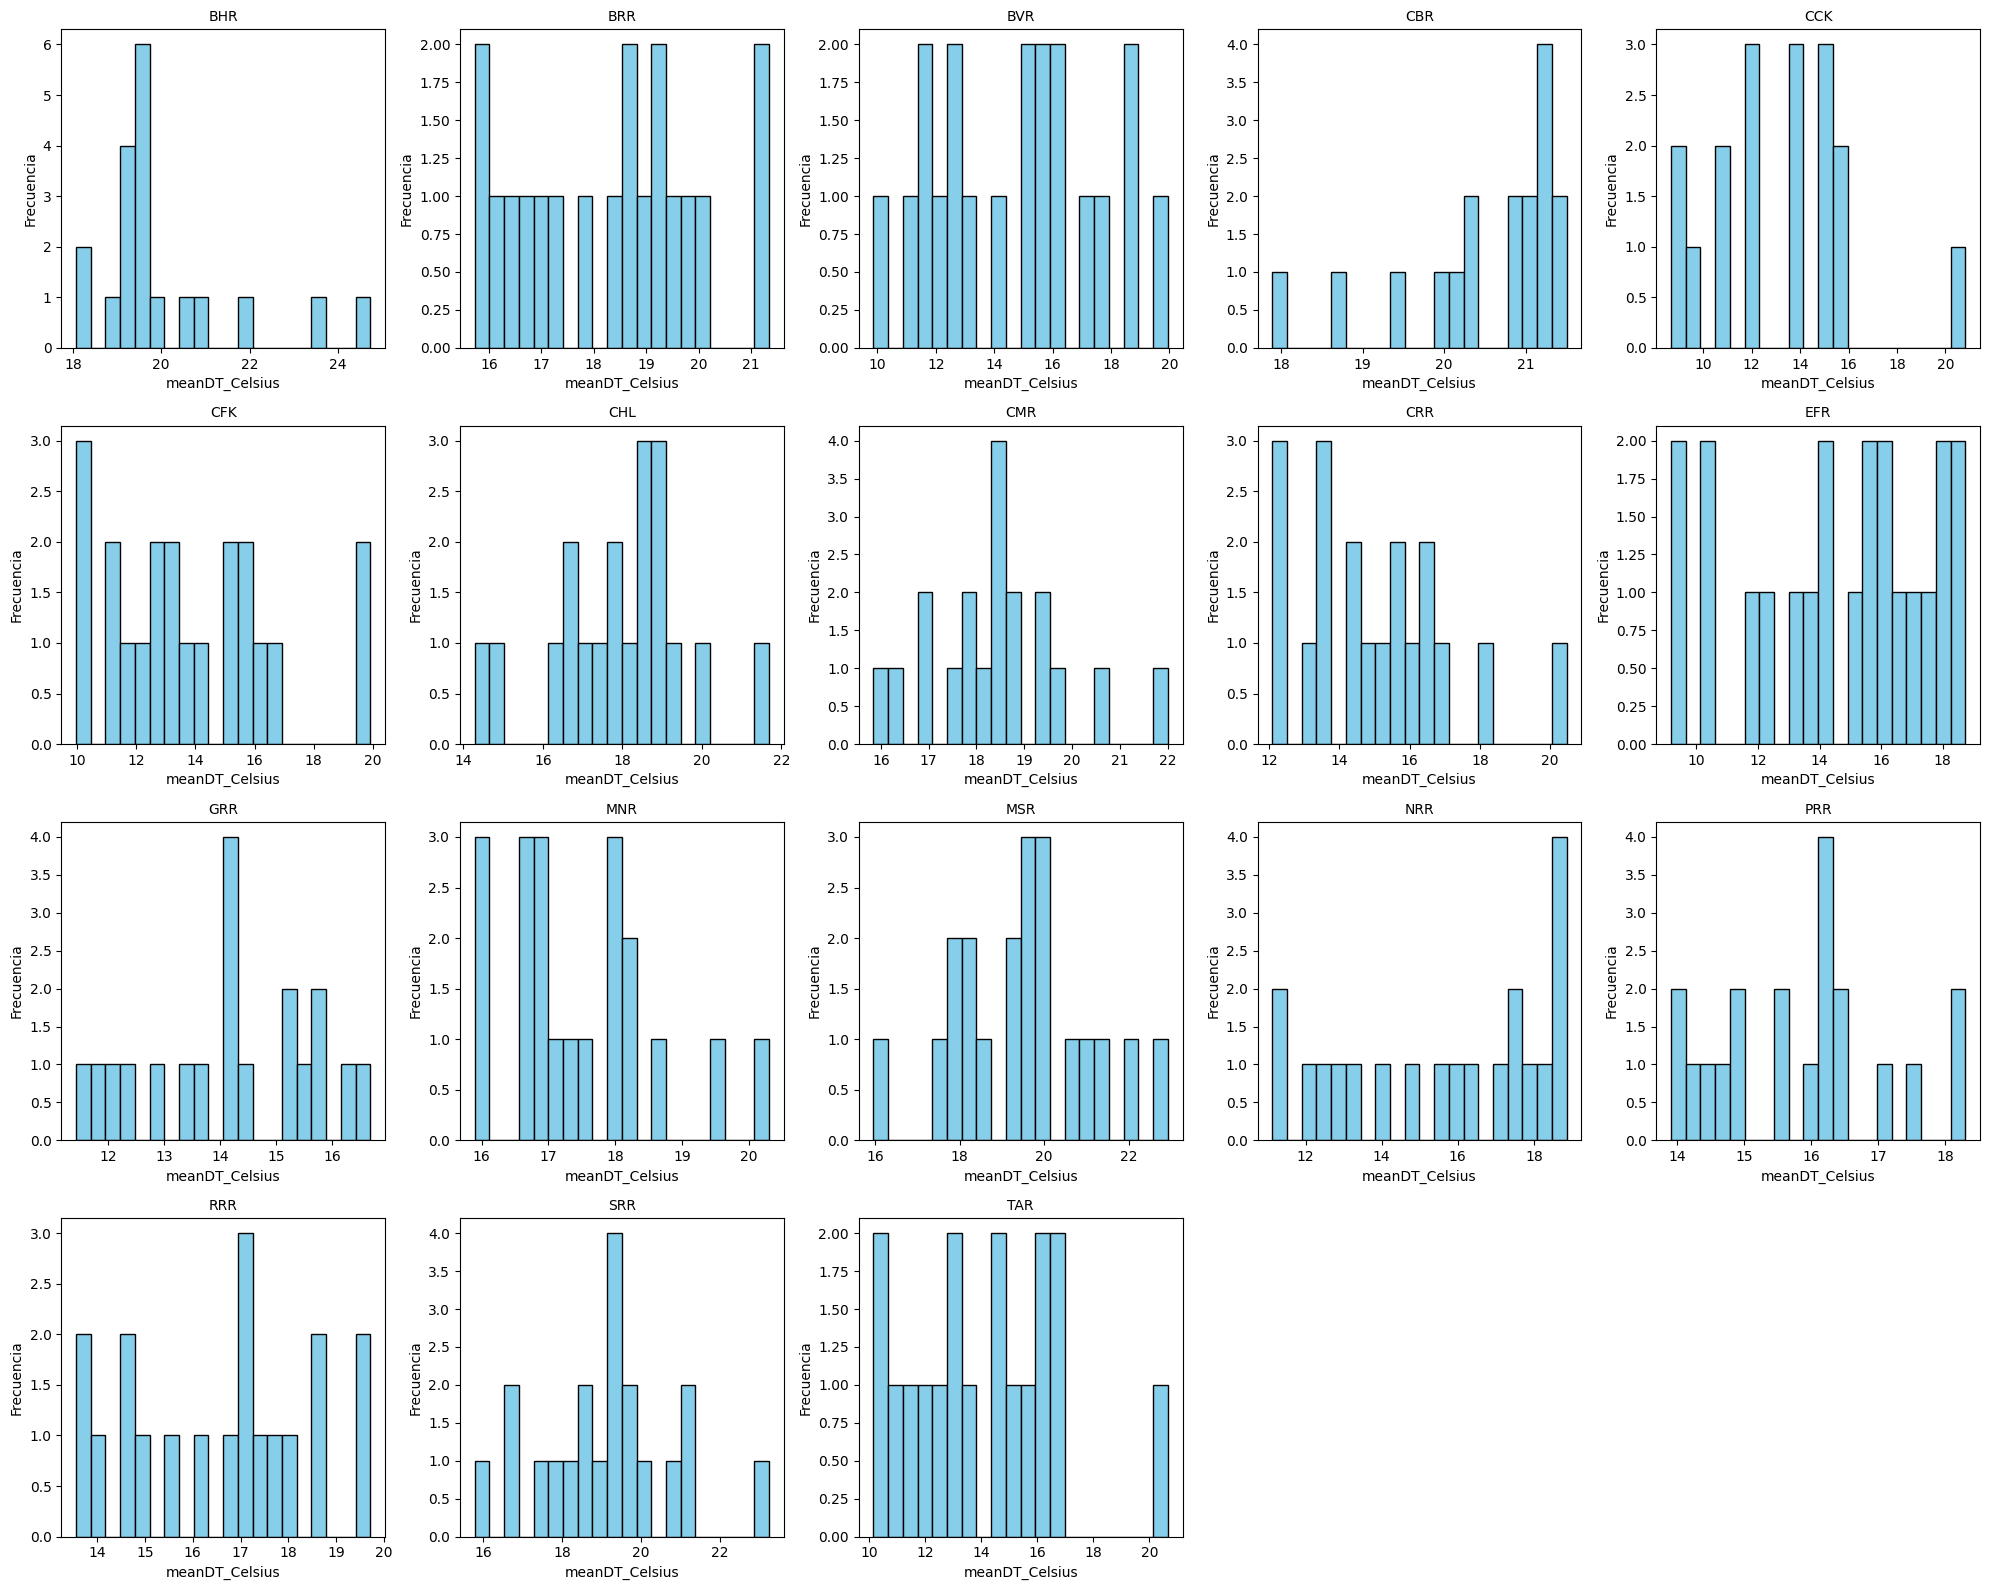

In [26]:
# Filtrar filas sin datos nulos en la columna 'meanDT_Celsius'
df_filtrado = df[['Reservoir', 'meanDT_Celsius']].dropna()

# Obtener los primeros 20 embalses únicos
embalses = df_filtrado['Reservoir'].unique()[:20]

# Crear una cuadrícula de 4x5 para los subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Generar histogramas para cada embalse en la cuadrícula
for ax, embalse in zip(axes.flatten(), embalses):
    datos = df_filtrado[df_filtrado['Reservoir'] == embalse]['meanDT_Celsius']
    ax.hist(datos, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'{embalse}', fontsize=10)
    ax.set_xlabel('meanDT_Celsius')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots vacíos si hay menos de 20 embalses
for ax in axes.flatten()[len(embalses):]:
    fig.delaxes(ax)

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()


La temperatura en profundidad no tiene una distribución definida en muchos casos. Me parece conveniente rellenar los valores nulos con la mediana de cada embalse en este caso

In [27]:
# Calcular la mediana de 'meanDT_Celsius' por embalse
medianas_embalse = df.groupby('Reservoir')['meanDT_Celsius'].transform('median')

# Rellenar los valores nulos con la mediana correspondiente de cada embalse
df['meanDT_Celsius'] = df['meanDT_Celsius'].fillna(medianas_embalse)

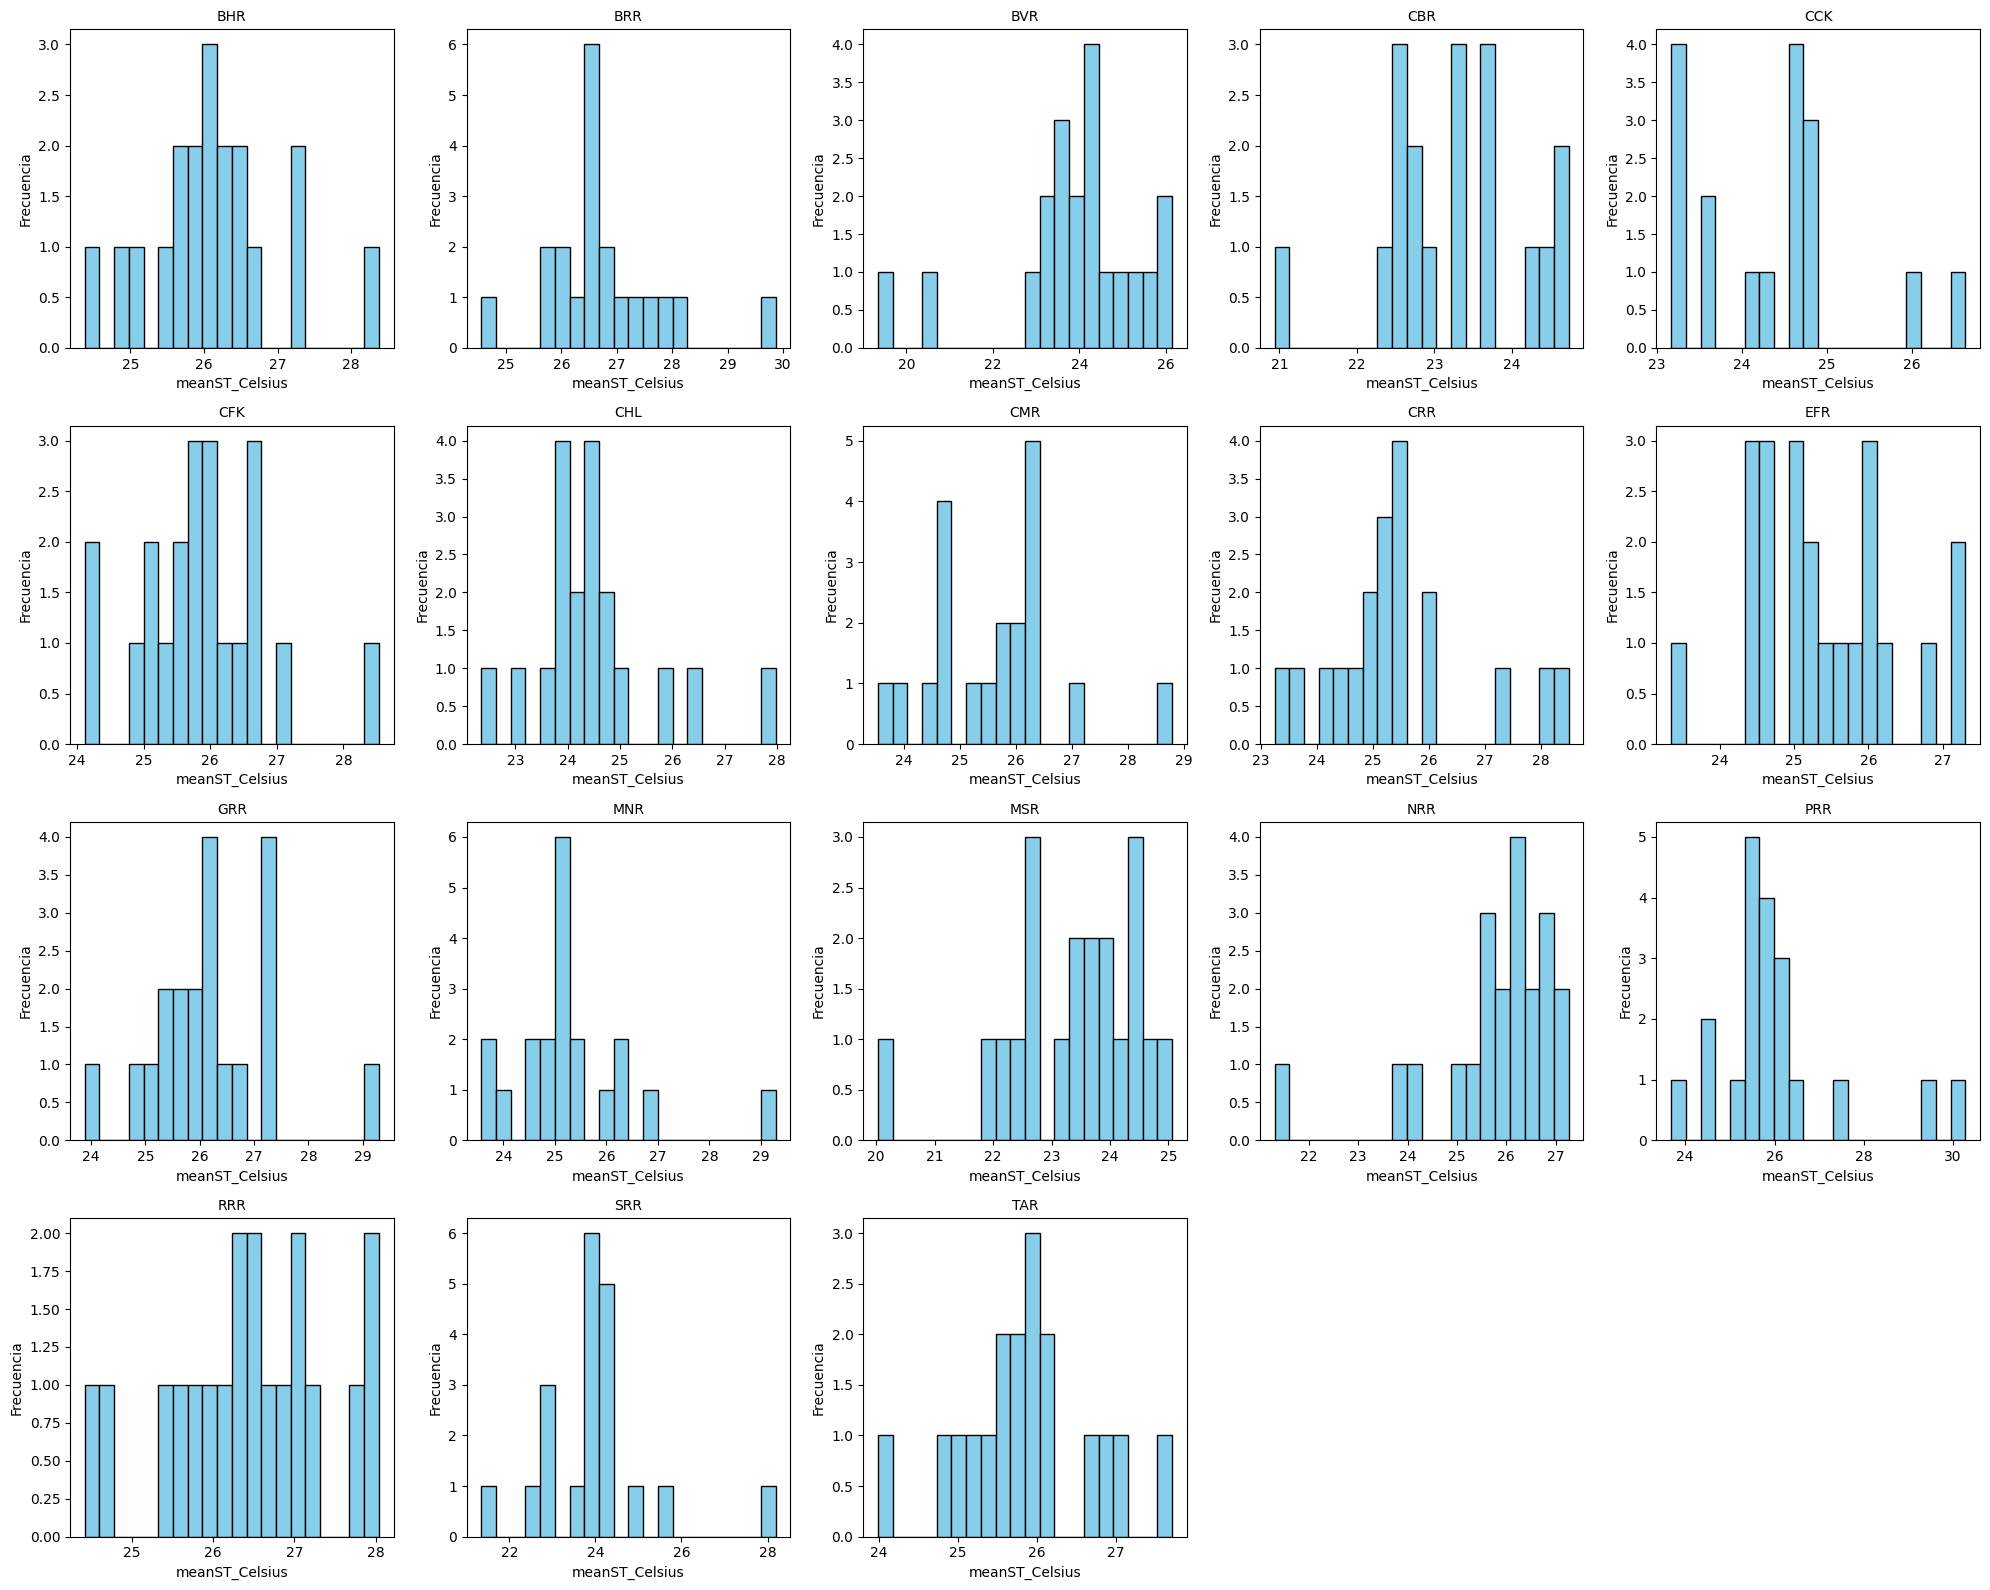

In [28]:
# Filtrar filas sin datos nulos en la columna 'meanST_Celsius'
df_filtrado = df[['Reservoir', 'meanST_Celsius']].dropna()

# Obtener los primeros 20 embalses únicos
embalses = df_filtrado['Reservoir'].unique()[:20]

# Crear una cuadrícula de 4x5 para los subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Generar histogramas para cada embalse en la cuadrícula
for ax, embalse in zip(axes.flatten(), embalses):
    datos = df_filtrado[df_filtrado['Reservoir'] == embalse]['meanST_Celsius']
    ax.hist(datos, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'{embalse}', fontsize=10)
    ax.set_xlabel('meanST_Celsius')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots vacíos si hay menos de 20 embalses
for ax in axes.flatten()[len(embalses):]:
    fig.delaxes(ax)

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()

Para la temperatura en superficie uso la misma logica

In [29]:
# Calcular la mediana de 'meanST_Celsius' por embalse
medianas_embalse = df.groupby('Reservoir')['meanST_Celsius'].transform('median')

# Rellenar los valores nulos con la mediana correspondiente de cada embalse
df['meanST_Celsius'] = df['meanST_Celsius'].fillna(medianas_embalse)

### Nutrientes

Hago un promedio de oxigeno disuelto en los meses medidos para usar como variable

In [30]:
df['meanDO'] = df[['mayDO_mg/l', 'junDO_mg/l']].mean(axis=1)

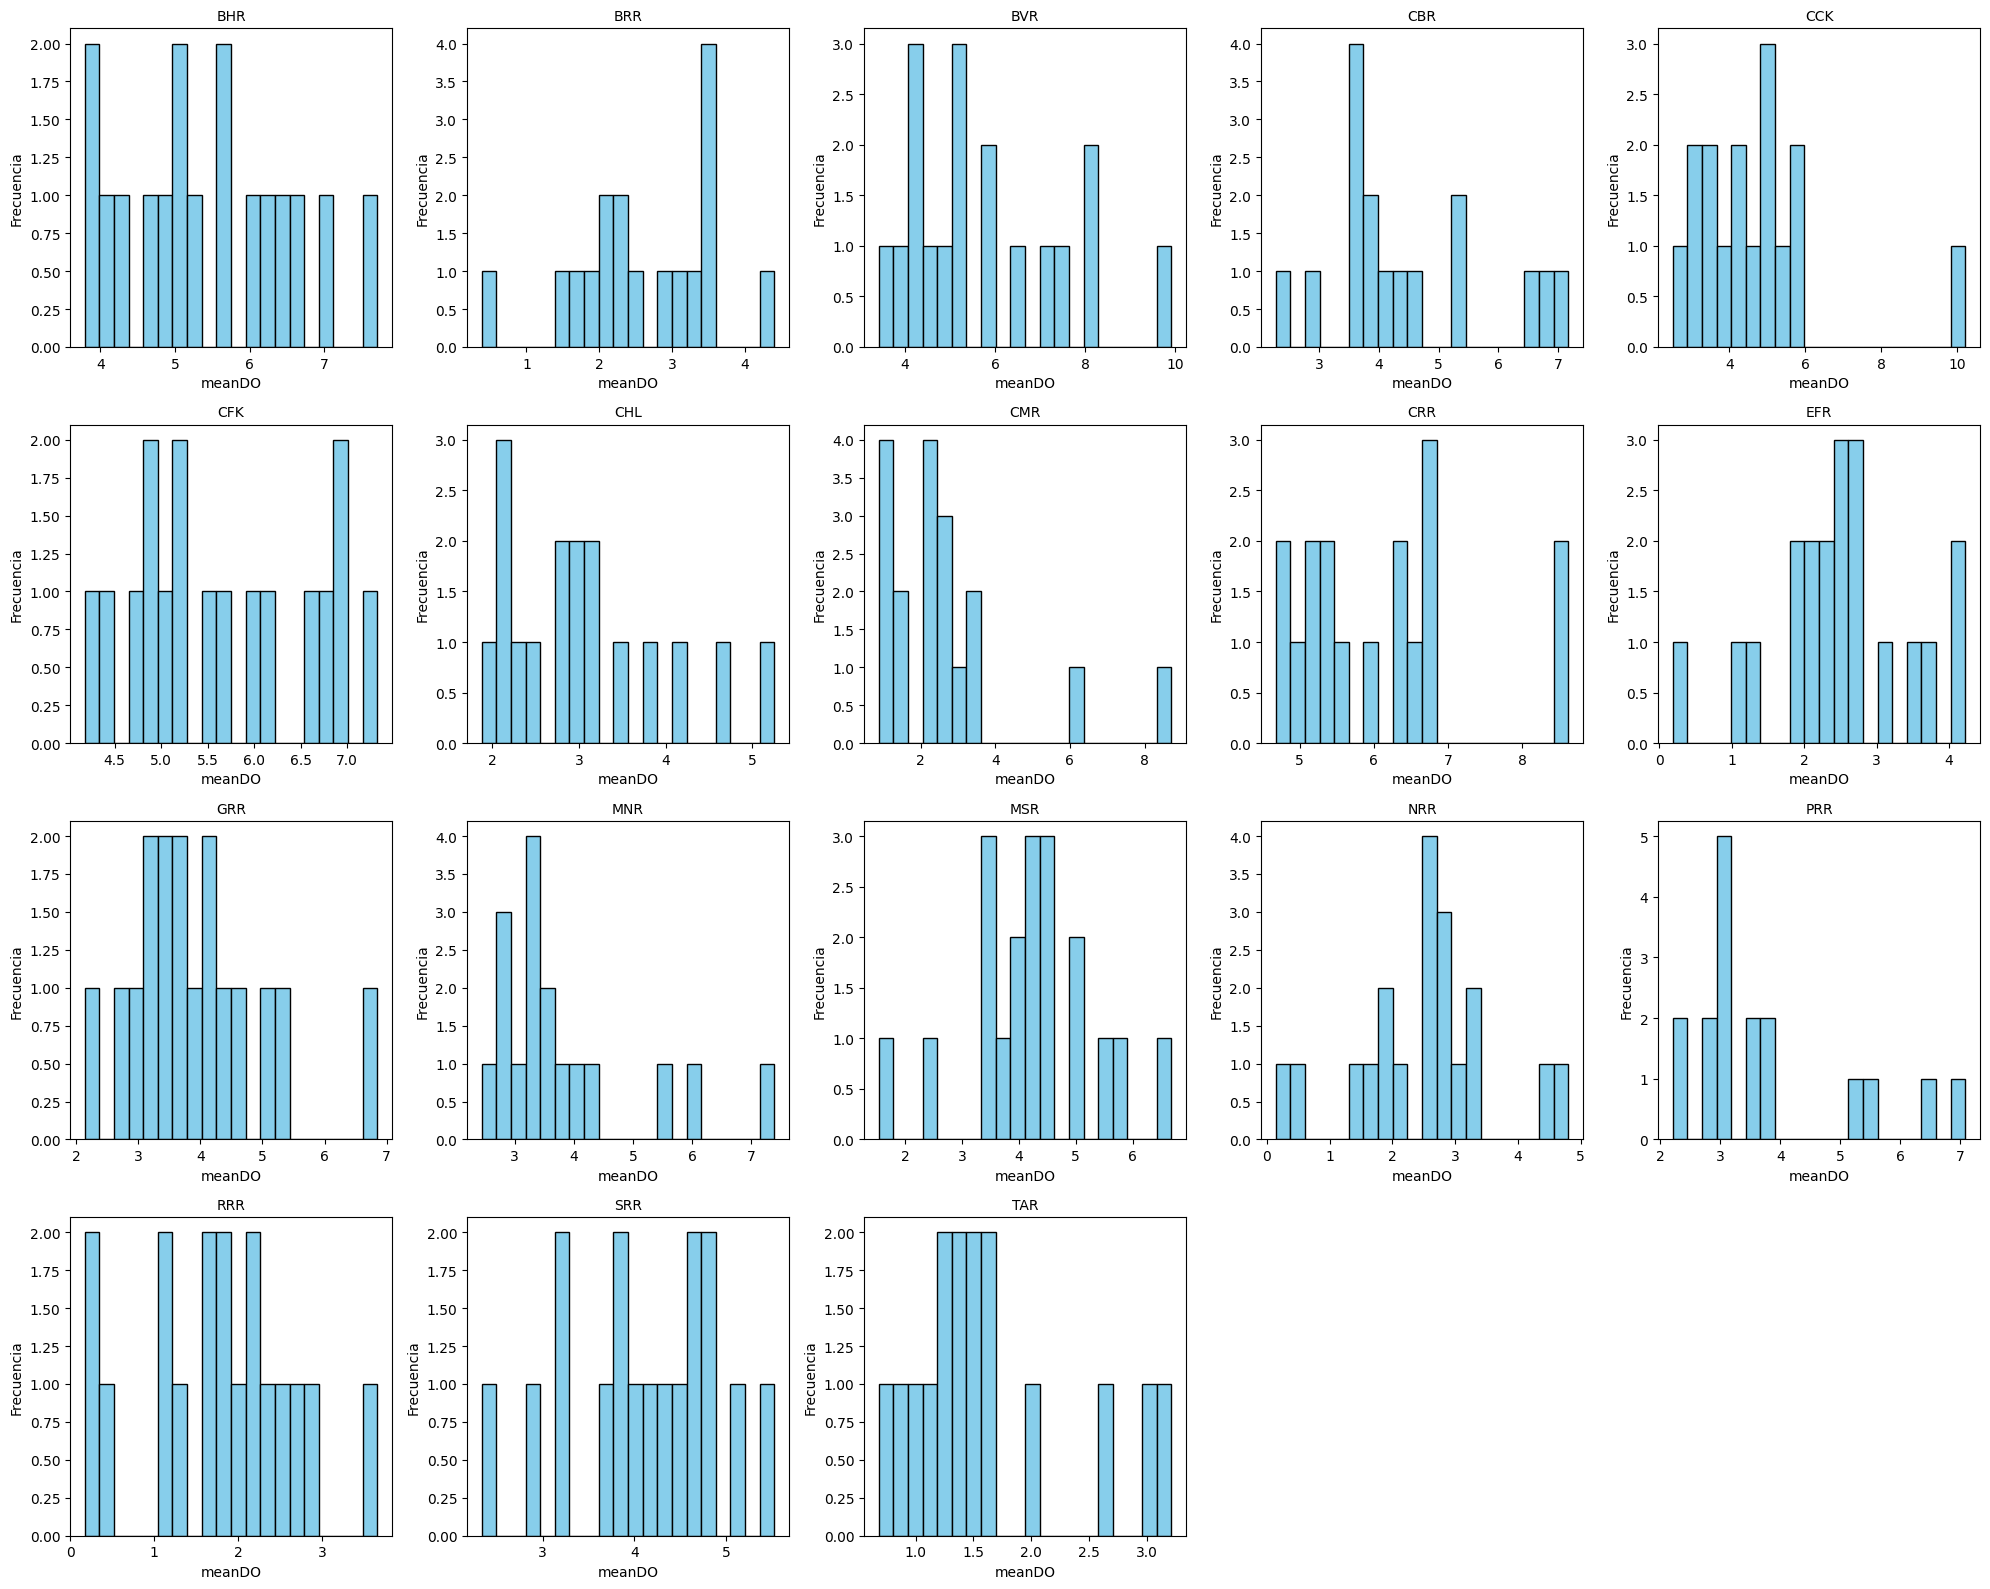

In [31]:
# Filtrar filas sin datos nulos en la columna 'meanDO'
df_filtrado = df[['Reservoir', 'meanDO']].dropna()

# Obtener los primeros 20 embalses únicos
embalses = df_filtrado['Reservoir'].unique()[:20]

# Crear una cuadrícula de 4x5 para los subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Generar histogramas para cada embalse en la cuadrícula
for ax, embalse in zip(axes.flatten(), embalses):
    datos = df_filtrado[df_filtrado['Reservoir'] == embalse]['meanDO']
    ax.hist(datos, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'{embalse}', fontsize=10)
    ax.set_xlabel('meanDO')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots vacíos si hay menos de 20 embalses
for ax in axes.flatten()[len(embalses):]:
    fig.delaxes(ax)

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()

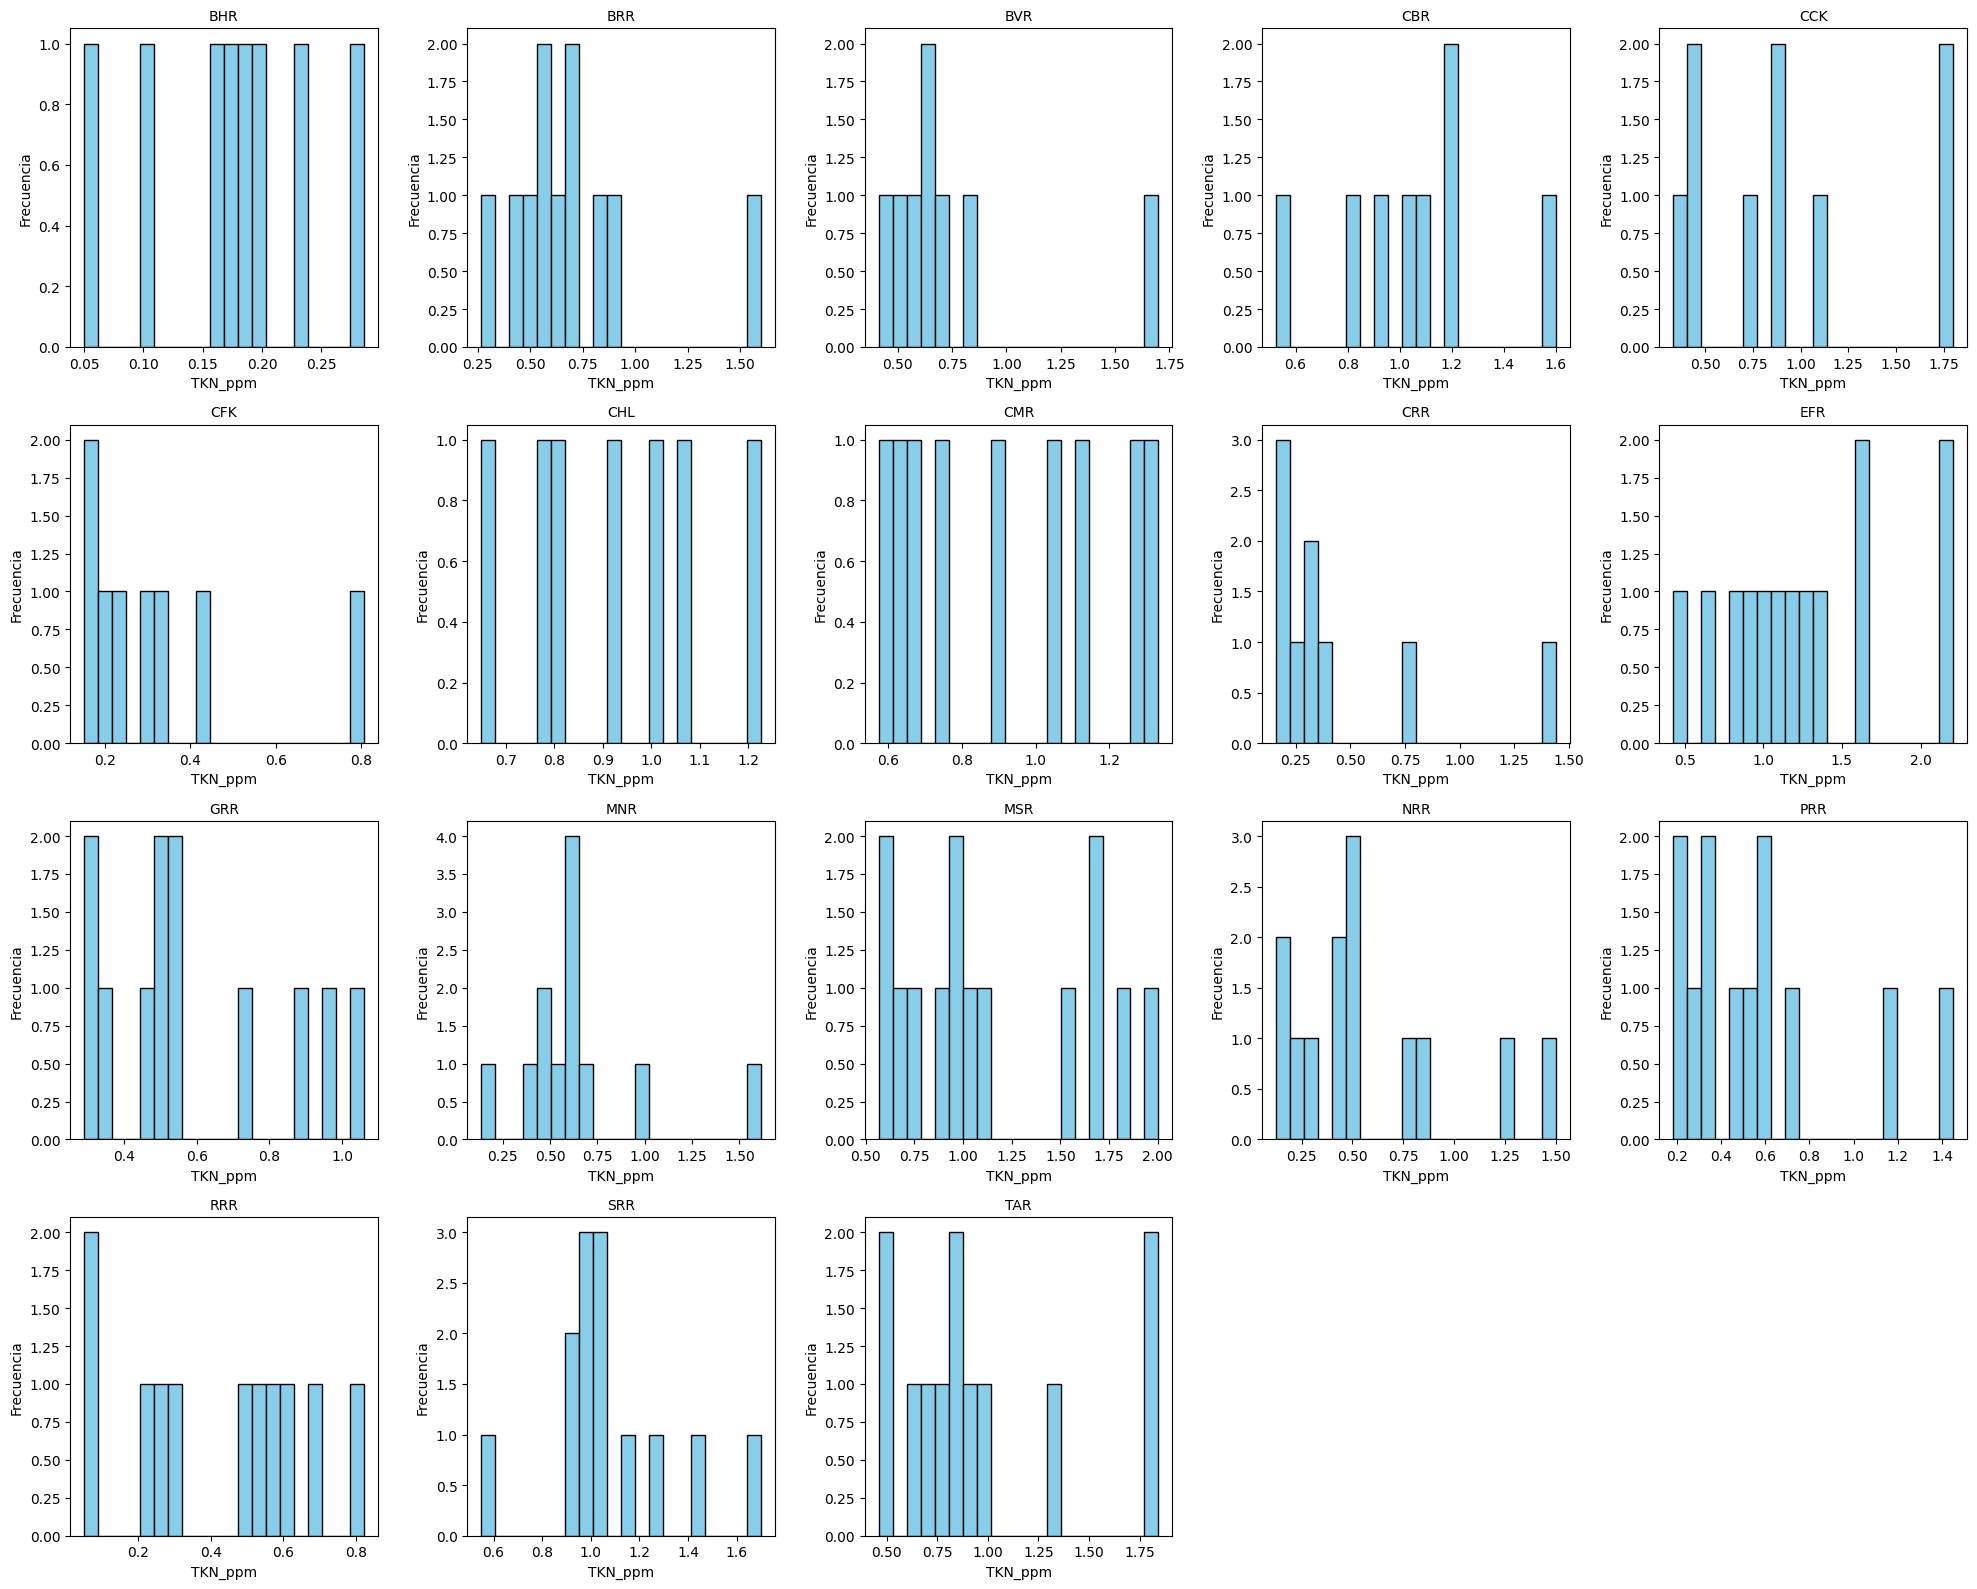

In [32]:
# Filtrar filas sin datos nulos en la columna 'TKN_ppm'
df_filtrado = df[['Reservoir', 'TKN_ppm']].dropna()

# Obtener los primeros 20 embalses únicos
embalses = df_filtrado['Reservoir'].unique()[:20]

# Crear una cuadrícula de 4x5 para los subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Generar histogramas para cada embalse en la cuadrícula
for ax, embalse in zip(axes.flatten(), embalses):
    datos = df_filtrado[df_filtrado['Reservoir'] == embalse]['TKN_ppm']
    ax.hist(datos, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'{embalse}', fontsize=10)
    ax.set_xlabel('TKN_ppm')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots vacíos si hay menos de 20 embalses
for ax in axes.flatten()[len(embalses):]:
    fig.delaxes(ax)

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()

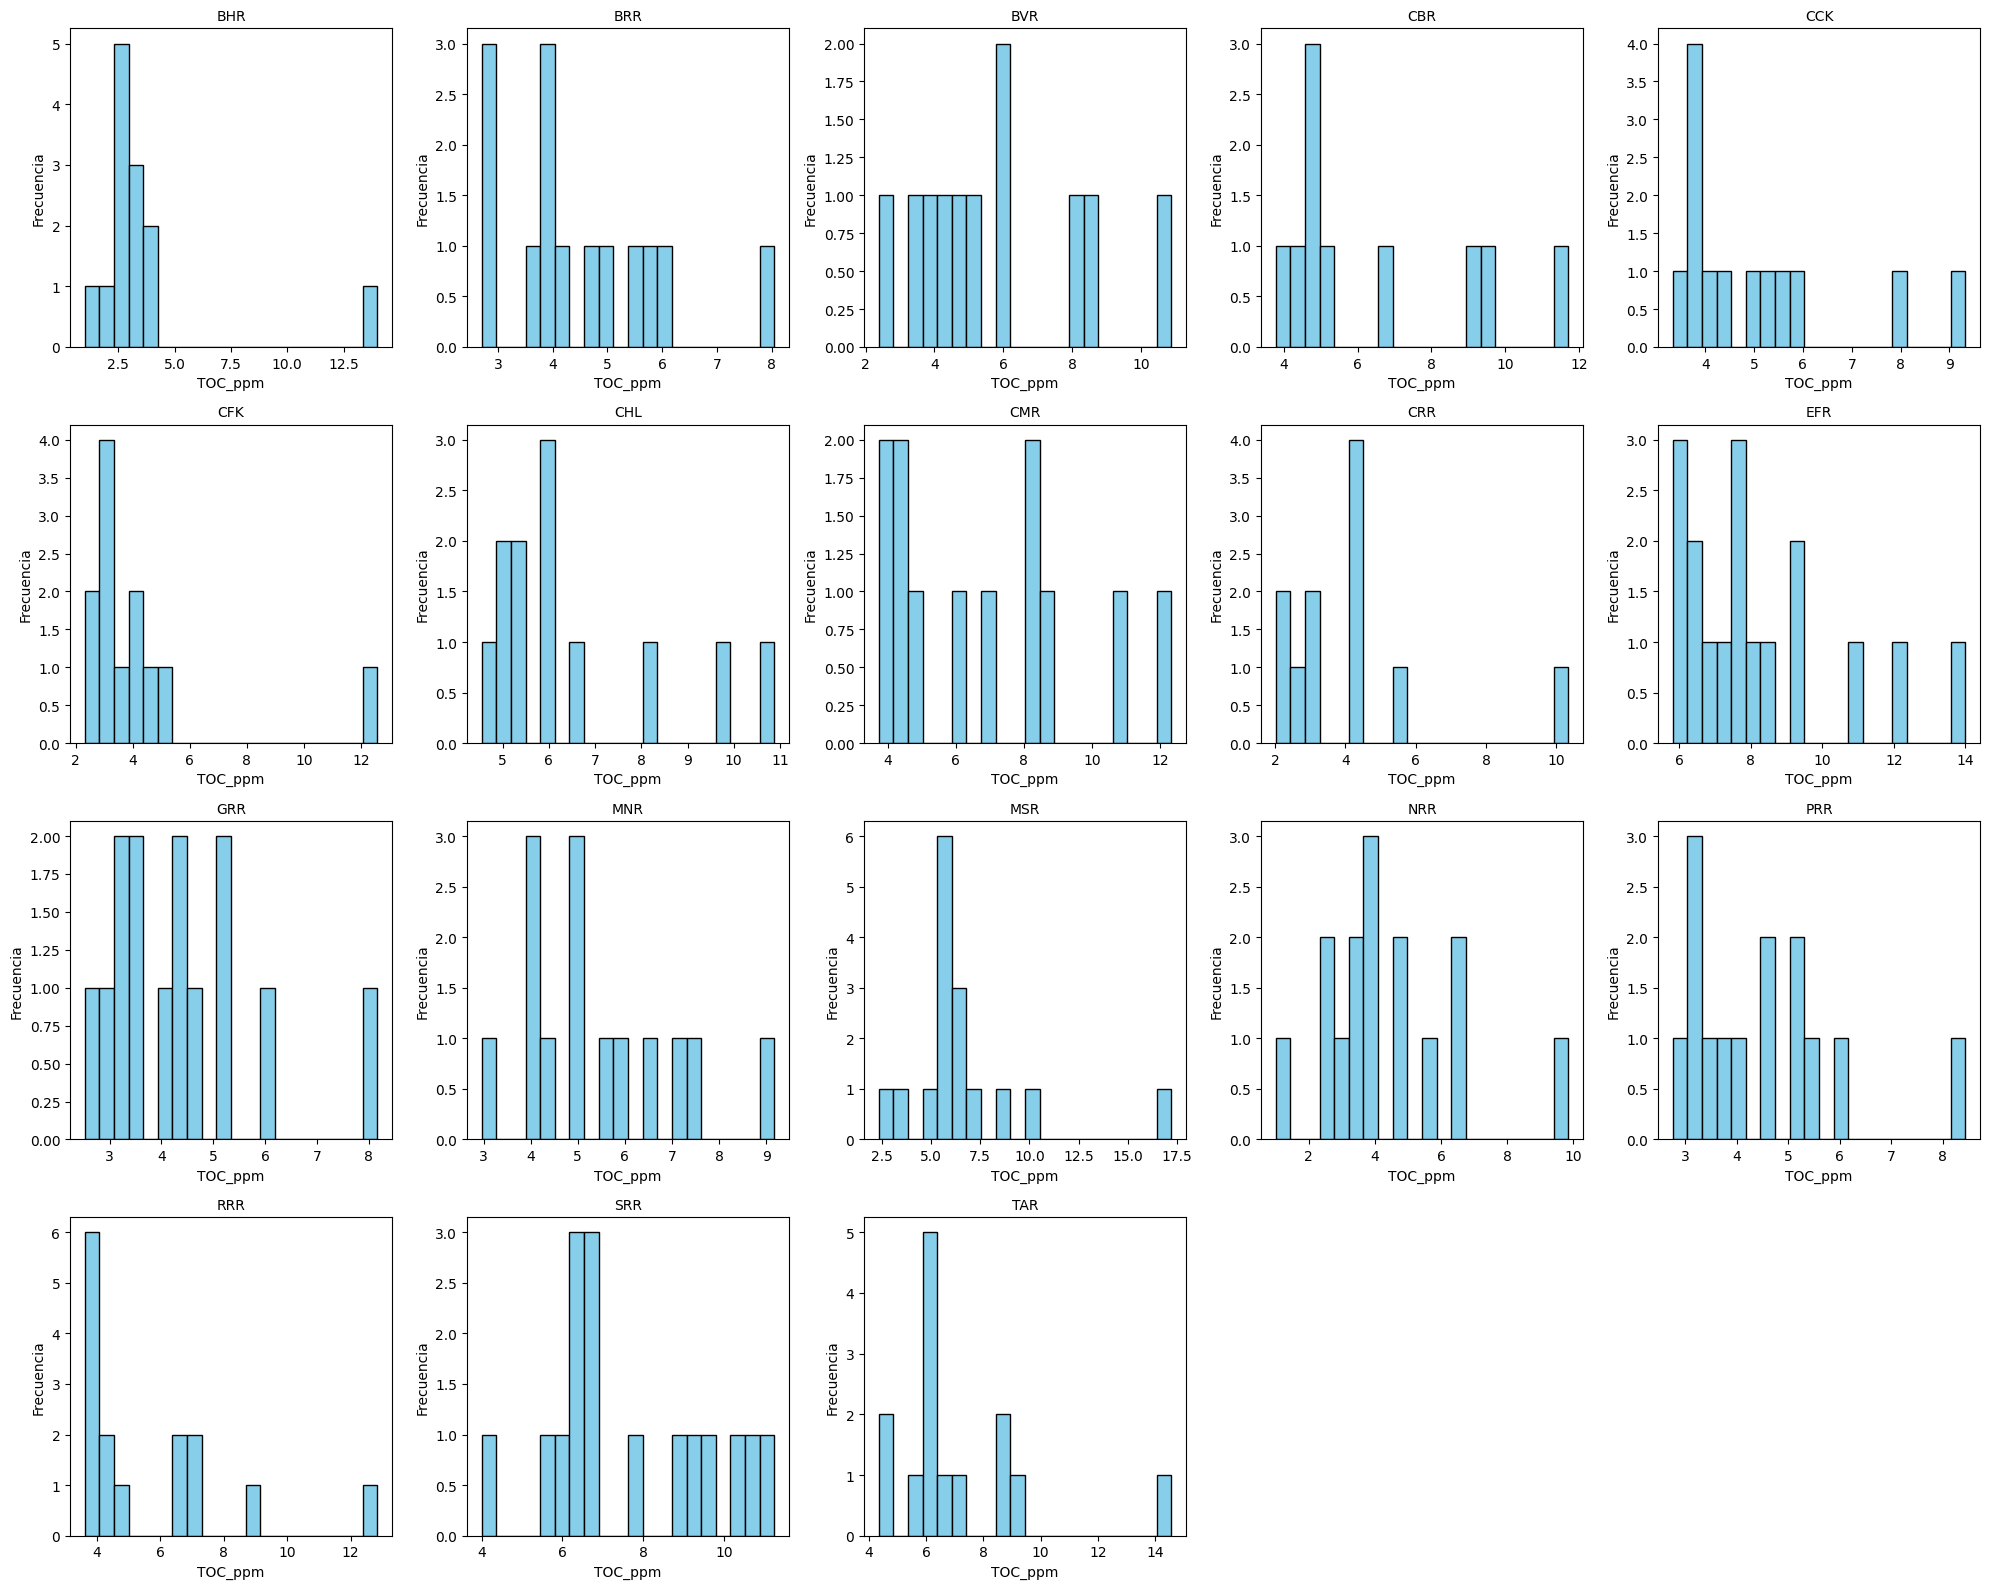

In [33]:
# Filtrar filas sin datos nulos en la columna 'TOC_ppm'
df_filtrado = df[['Reservoir', 'TOC_ppm']].dropna()

# Obtener los primeros 20 embalses únicos
embalses = df_filtrado['Reservoir'].unique()[:20]

# Crear una cuadrícula de 4x5 para los subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Generar histogramas para cada embalse en la cuadrícula
for ax, embalse in zip(axes.flatten(), embalses):
    datos = df_filtrado[df_filtrado['Reservoir'] == embalse]['TOC_ppm']
    ax.hist(datos, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'{embalse}', fontsize=10)
    ax.set_xlabel('TOC_ppm')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots vacíos si hay menos de 20 embalses
for ax in axes.flatten()[len(embalses):]:
    fig.delaxes(ax)

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()

Teniendo en cuenta que para los nutrientes analizados se observa en general una distribución asimétrica o que no tienen una distribución definida, es conveniente rellenar los nulos en las variables de nutrientes por la mediana.

In [34]:
# Lista de columnas para rellenar con la mediana por embalse
columnas = [
    'TP_ppb', 'P_dissolved_ppb', 'TKN_ppm', 'NH3_ppm', 'NOx_ppm', 'TOC_ppm',
    'Alkalinity_ppm', 'NH36to8inflow_ppm', 'TKN6to8inflow_ppm', 'NOx6to8inflow_ppm',
    'TP6to8inflow_ppb', 'TOC6to8inflow_ppm', 'Summer_precip_inches', 'meanDO'
]

# Iterar sobre cada columna para calcular la mediana y rellenar nulos
for col in columnas:
    # Calcular la mediana por embalse (Reservoir)
    medianas_embalse = df.groupby('Reservoir')[col].transform('median')

    # Rellenar los valores nulos con la mediana correspondiente
    df[col] = df[col].fillna(medianas_embalse)

print("Terminado")

Terminado


In [35]:
print(df.isnull().sum())

Reservoir                       0
Reservoir_type                  0
Year                            0
Cyanobacteria_Max_cells/ml      0
logCyanoMax_cells/ml            0
Chlorophyll_a_ug/l            232
Secchi_cm                      20
TP_ppb                          0
P_dissolved_ppb                 0
TKN_ppm                         0
NH3_ppm                         0
NOx_ppm                         0
TOC_ppm                         0
Alkalinity_ppm                  0
NH36to8inflow_ppm              22
TKN6to8inflow_ppm              22
NOx6to8inflow_ppm              22
TP6to8inflow_ppb               22
TOC6to8inflow_ppm              22
Summer_precip_inches            0
Summer_precip_Z-score           0
mayST_Celsius                  80
junST_Celsius                  71
julST_Celsius                  61
augST_Celsius                  48
mayDO_mg/l                     81
junDO_mg/l                     74
mayDT_Celsius                  81
junDT_Celsius                  72
julDT_Celsius 

Genero la tabla solo con las columnas que se van a utilizar

In [36]:
df = df[['Reservoir', 'Reservoir_type', 'Year', 'Cyanobacteria_Max_cells/ml', 'TP_ppb',
       'P_dissolved_ppb', 'TKN_ppm', 'NH3_ppm', 'NOx_ppm', 'TOC_ppm',
       'Alkalinity_ppm', 'NH36to8inflow_ppm', 'TKN6to8inflow_ppm',
       'NOx6to8inflow_ppm', 'TP6to8inflow_ppb', 'TOC6to8inflow_ppm',
       'Summer_precip_inches', 'meanST_Celsius', 'meanDT_Celsius', 'meanDO']]

In [37]:
df.head()

,Reservoir,Reservoir_type,Year,Cyanobacteria_Max_cells/ml,TP_ppb,P_dissolved_ppb,TKN_ppm,NH3_ppm,NOx_ppm,TOC_ppm,Alkalinity_ppm,NH36to8inflow_ppm,TKN6to8inflow_ppm,NOx6to8inflow_ppm,TP6to8inflow_ppb,TOC6to8inflow_ppm,Summer_precip_inches,meanST_Celsius,meanDT_Celsius,meanDO
1,BHR,1,1988,235.616384,5.0,32.5,0.0500,0.0500,0.042371,1.00,34.000000,0.00000,0.1750,0.150,11.000000,2.00,8.86,26.141304,19.582896,5.255311
5,BHR,1,1992,2626.811594,70.0,70.0,0.1825,0.0500,0.100000,3.00,40.000000,0.05000,0.1875,0.200,140.000000,3.50,17.13,24.379446,19.217228,7.080454
6,BHR,1,1993,2292.500000,5.0,49.8,0.1825,0.2500,0.042371,3.00,26.000000,0.20000,0.1875,0.155,29.566667,3.00,13.57,26.423290,19.174584,6.312729
8,BHR,1,1995,68.076923,5.0,49.8,0.1825,0.0523,0.042371,3.95,51.000000,0.06345,0.1875,0.045,29.566667,6.20,6.17,25.639131,18.071845,6.403479
11,BHR,1,1998,23.069762,5.0,49.8,0.1825,0.0523,0.042371,2.90,65.233333,0.06345,0.1875,0.155,29.566667,3.25,13.64,26.141304,19.429565,5.688781


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 1 to 607
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Reservoir                   383 non-null    object 
 1   Reservoir_type              383 non-null    int64  
 2   Year                        383 non-null    int64  
 3   Cyanobacteria_Max_cells/ml  383 non-null    float64
 4   TP_ppb                      383 non-null    float64
 5   P_dissolved_ppb             383 non-null    float64
 6   TKN_ppm                     383 non-null    float64
 7   NH3_ppm                     383 non-null    float64
 8   NOx_ppm                     383 non-null    float64
 9   TOC_ppm                     383 non-null    float64
 10  Alkalinity_ppm              383 non-null    float64
 11  NH36to8inflow_ppm           361 non-null    float64
 12  TKN6to8inflow_ppm           361 non-null    float64
 13  NOx6to8inflow_ppm           361 non-null

Me fijo que embalse no tienen registros en las columnas inflow_ppm para quitarlo

In [39]:
# Filtrar los embalses con valores nulos en la columna 'NH36to8inflow_ppm'
embalses_con_nulos = df[df['NH36to8inflow_ppm'].isnull()]['Reservoir'].unique()

# Mostrar los embalses con nulos
print("Embalses con valores nulos en 'NH36to8inflow_ppm':")
print(embalses_con_nulos)


Embalses con valores nulos en 'NH36to8inflow_ppm':
['SRR']


In [40]:
# Eliminar las filas donde el embalse es 'SRR'
df = df[df['Reservoir'] != 'SRR']

# Verificar que se eliminó correctamente
print(f"Filas restantes: {len(df)}")
print(df['Reservoir'].unique())  # Lista de embalses restantes

Filas restantes: 361
['BHR' 'BRR' 'BVR' 'CBR' 'CCK' 'CFK' 'CHL' 'CMR' 'CRR' 'EFR' 'GRR' 'MNR'
 'MSR' 'NRR' 'PRR' 'RRR' 'TAR']


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361 entries, 1 to 607
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Reservoir                   361 non-null    object 
 1   Reservoir_type              361 non-null    int64  
 2   Year                        361 non-null    int64  
 3   Cyanobacteria_Max_cells/ml  361 non-null    float64
 4   TP_ppb                      361 non-null    float64
 5   P_dissolved_ppb             361 non-null    float64
 6   TKN_ppm                     361 non-null    float64
 7   NH3_ppm                     361 non-null    float64
 8   NOx_ppm                     361 non-null    float64
 9   TOC_ppm                     361 non-null    float64
 10  Alkalinity_ppm              361 non-null    float64
 11  NH36to8inflow_ppm           361 non-null    float64
 12  TKN6to8inflow_ppm           361 non-null    float64
 13  NOx6to8inflow_ppm           361 non-null

No quedaron valores nulos y me quedo con datos de 17 embalses

# Análisis Exploratorio

## Cual fue la tendencia de aparición de floraciones durante los años?

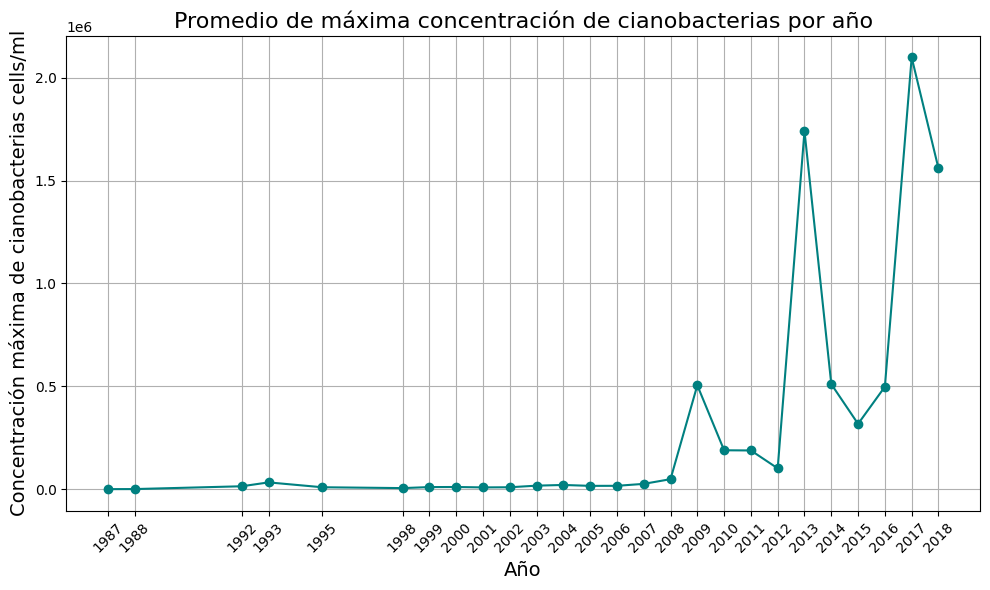

In [42]:
# Calcular la concentración máxima promedio de cianobacterias por año
promedio_cianobacterias = df.groupby('Year')['Cyanobacteria_Max_cells/ml'].mean()

plt.figure(figsize=(10, 6))
plt.plot(promedio_cianobacterias.index, promedio_cianobacterias.values, marker='o', linestyle='-', color='teal')

plt.title('Promedio de máxima concentración de cianobacterias por año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Concentración máxima de cianobacterias cells/ml', fontsize=14)
plt.grid(True)
plt.xticks(promedio_cianobacterias.index, rotation=45)

plt.tight_layout()
plt.show()


Se observa que a nivel global la concentración maxima de cianobacterias promedio comenzó a aumentar desde el año 2009, con algunos descensos (puede deberse a diferencias en registros entre embalses)

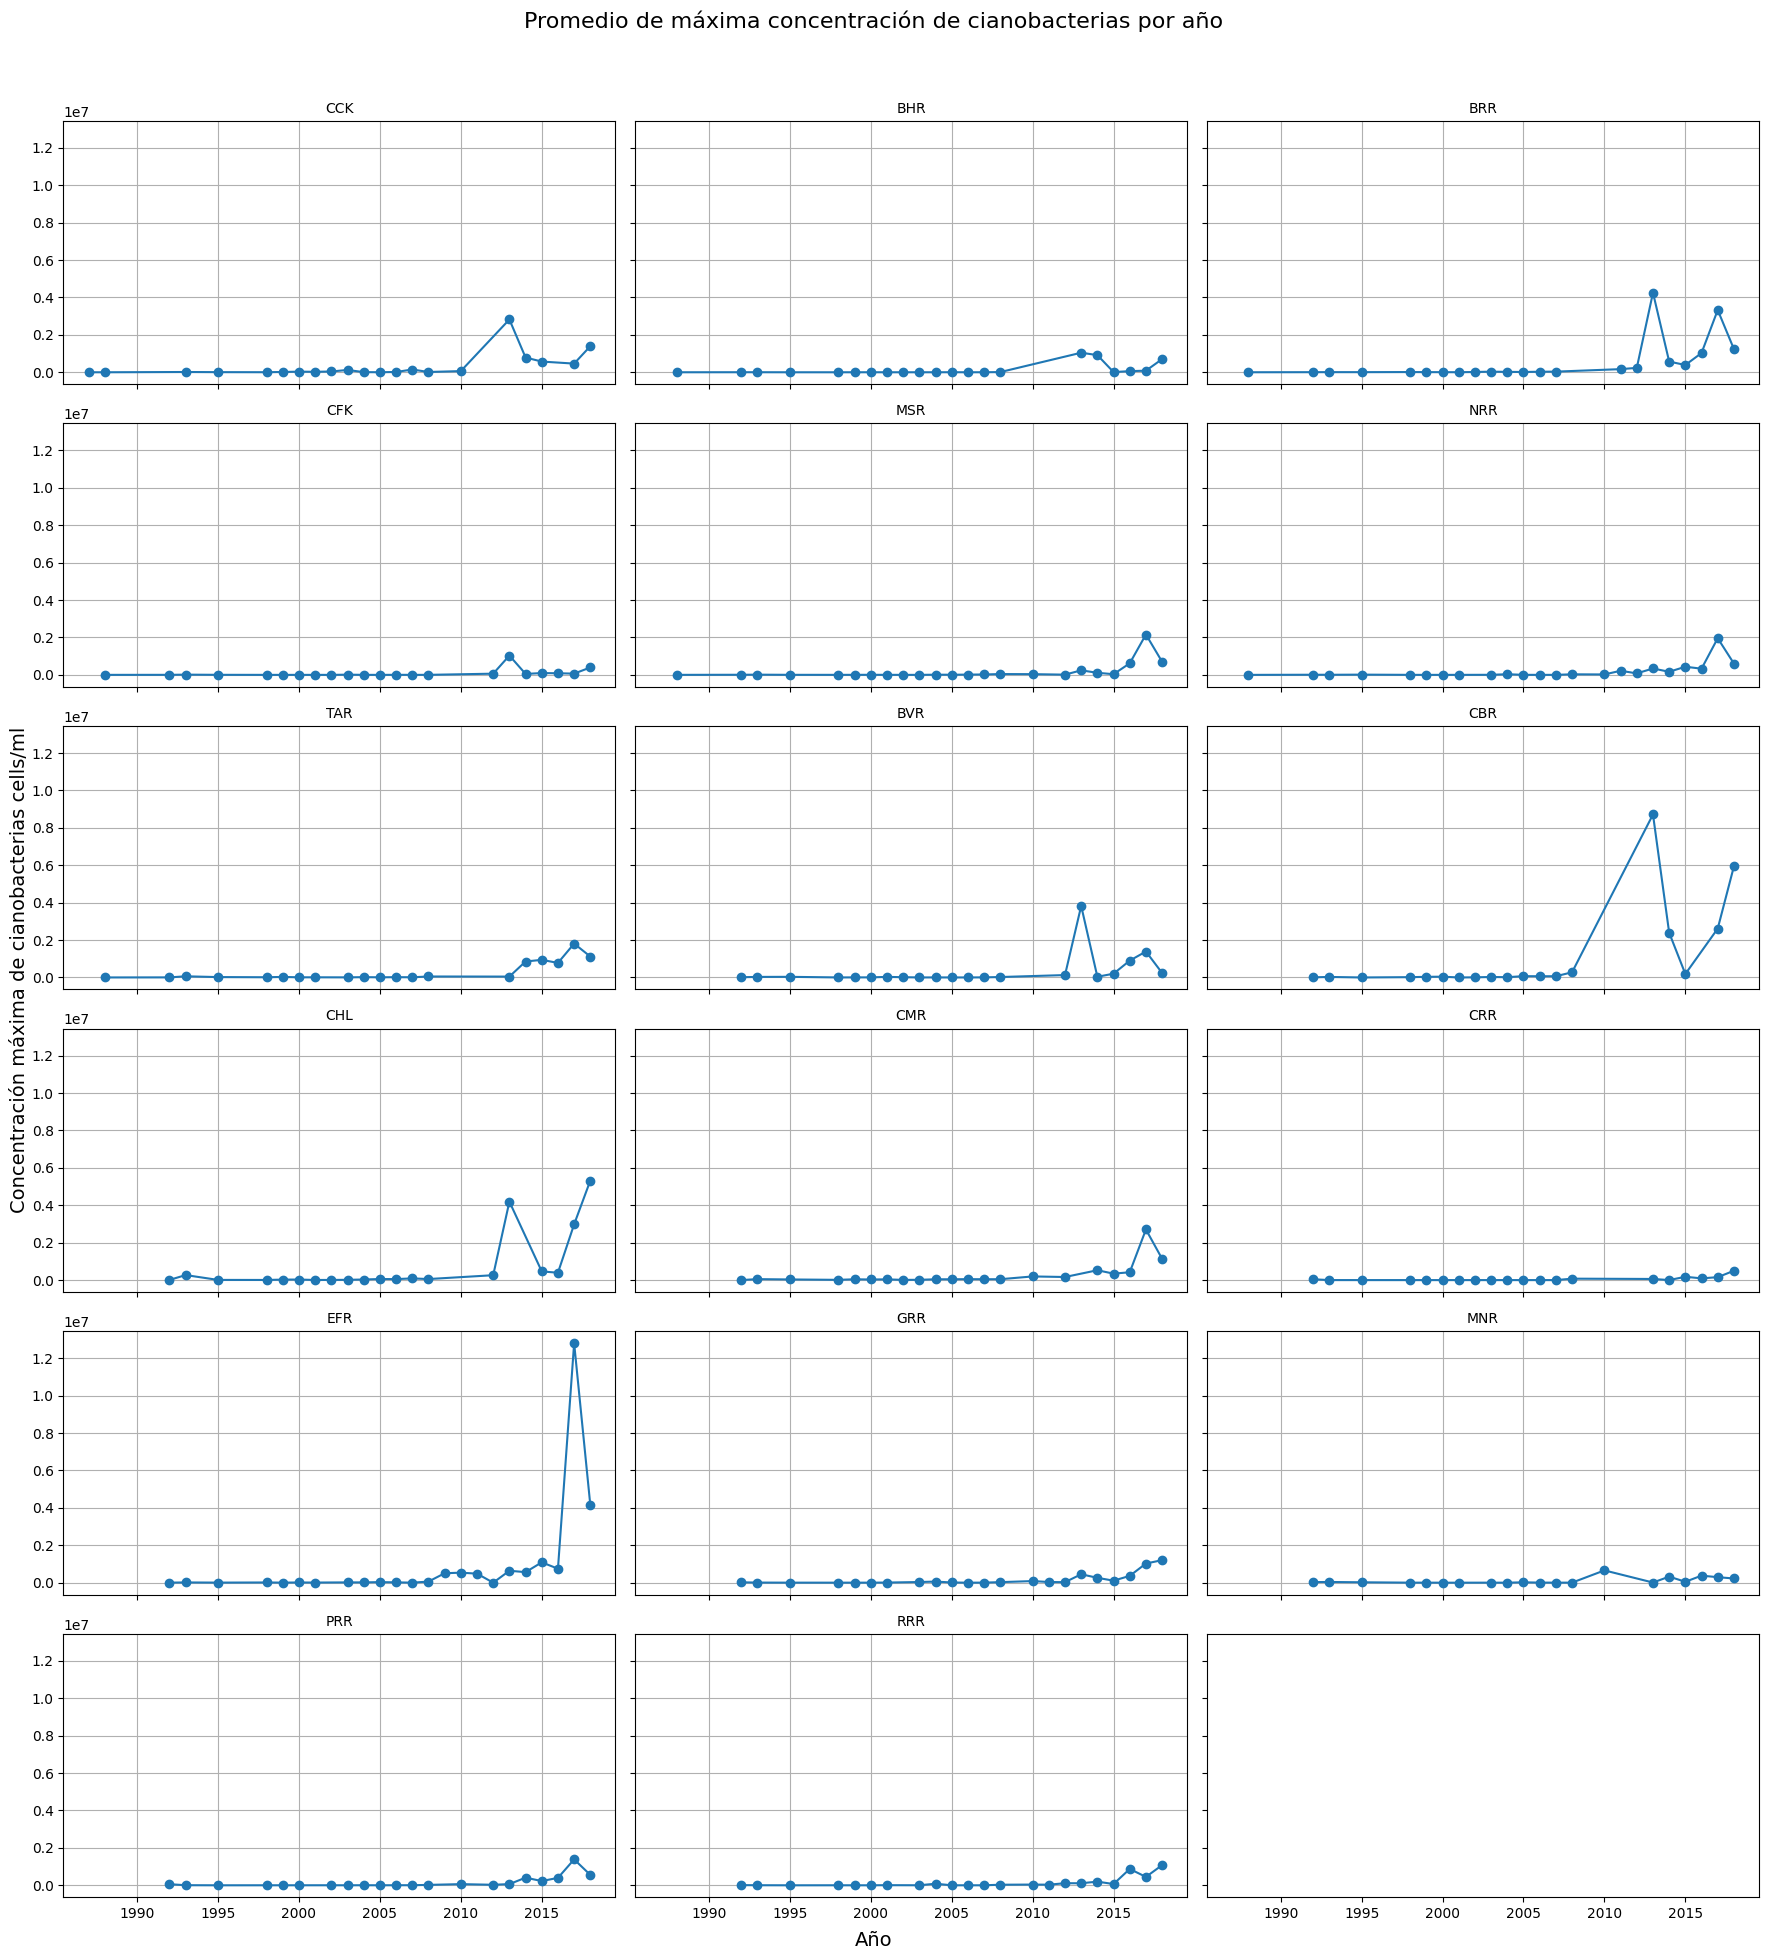

In [43]:
# Calcular la concentración máxima promedio de cianobacterias por embalse y año
promedio_por_embalse = df.groupby(['Year', 'Reservoir'])['Cyanobacteria_Max_cells/ml'].mean().reset_index()

# Obtener la lista de embalses
embalses = promedio_por_embalse['Reservoir'].unique()

# Crear subplots (6 filas x 3 columnas para 17 embalses)
fig, axes = plt.subplots(6, 3, figsize=(18, 20), sharex=True, sharey=True)

# Recorrer cada embalse y graficarlo
for ax, embalse in zip(axes.flatten(), embalses):
    # Filtrar los datos del embalse actual
    data = promedio_por_embalse[promedio_por_embalse['Reservoir'] == embalse]

    # Graficar el embalse
    ax.plot(data['Year'], data['Cyanobacteria_Max_cells/ml'], marker='o', linestyle='-')
    ax.set_title(f'{embalse}', fontsize=10)
    ax.grid(True)

# Ajustar etiquetas de ejes y espacio entre gráficos
fig.suptitle('Promedio de máxima concentración de cianobacterias por año', fontsize=16)
fig.supxlabel('Año', fontsize=14)
fig.supylabel('Concentración máxima de cianobacterias cells/ml', fontsize=14)

# Ajustar espacio entre subgráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar el gráfico
plt.show()


En todos los casos se observan picos de mayor numero de cianobacterias en los ultimos años de medición. Por lo que es una tendencia global

## ¿Existen diferencias en la concentración de cianobacterias entre distintos cuerpos de agua y tipos de ambiente?

In [44]:
df.pivot_table(values='Cyanobacteria_Max_cells/ml', index='Reservoir_type')

,Cyanobacteria_Max_cells/ml
Reservoir_type,
1,106737.385268
2,392517.788827
3,462958.512506


El tipo de embalse 1 es el que tiene en promedio menos concentración de cianobacterias (el que tiene menor intervencion humana)

(Reservoir_type: 1 = forested with stratification, 2 = agricultural with stratification, 3 = weak or no stratification (7 agricultural and 1 urban)

In [45]:
df.pivot_table(values='Cyanobacteria_Max_cells/ml', index=['Reservoir_type','Reservoir'])

Cyanobacteria_Max_cells/ml
Reservoir_type Reservoir                            
1              BHR                      1.355284e+05
               CFK                      8.344016e+04
               CRR                      5.546333e+04
               MNR                      1.036050e+05
               PRR                      1.541687e+05
2              BRR                      5.186699e+05
               BVR                      3.287038e+05
               CCK                      3.122325e+05
               EFR                      9.443706e+05
               GRR                      1.706318e+05
               RRR                      1.410710e+05
               TAR                      2.910900e+05
3              CBR                      1.079755e+06
               CHL                      7.141750e+05
               CMR                      2.838431e+05
               MSR                      1.760591e+05
               NRR                      1.854218e+05

EL embalse con mayor concentración de cianobacterias promedio es CBR (zona de agricultura no estratificada)

## ¿Qué nutrientes tienen mayor impacto en la aparición de florecimientos?

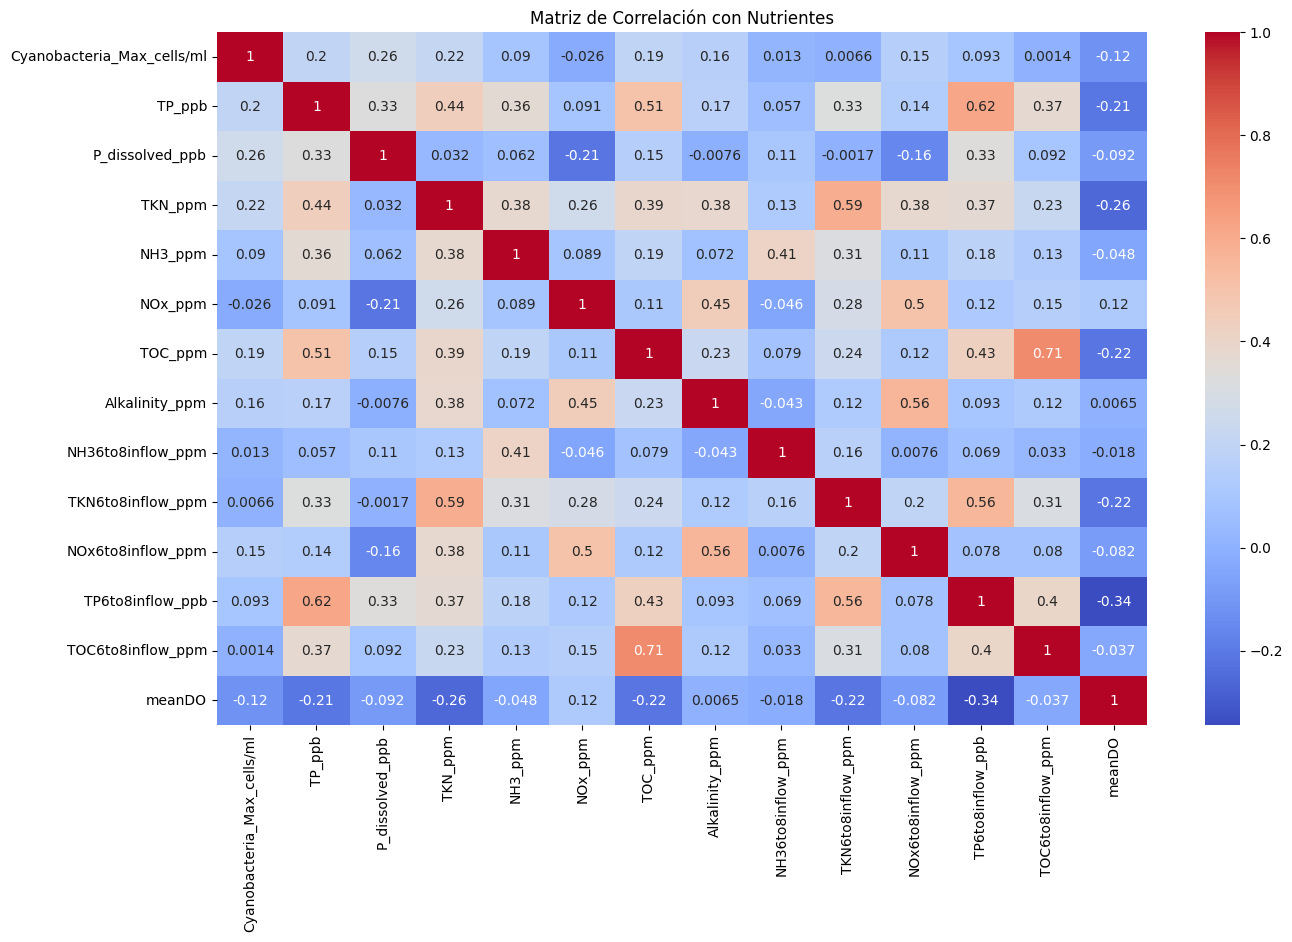

In [46]:
# Define las columnas que quieres incluir en la correlación
columnas_deseadas = ['Cyanobacteria_Max_cells/ml', 'TP_ppb',
       'P_dissolved_ppb', 'TKN_ppm', 'NH3_ppm', 'NOx_ppm', 'TOC_ppm',
       'Alkalinity_ppm', 'NH36to8inflow_ppm', 'TKN6to8inflow_ppm',
       'NOx6to8inflow_ppm', 'TP6to8inflow_ppb', 'TOC6to8inflow_ppm', 'meanDO']

# Filtra el DataFrame para incluir solo las columnas deseadas
df_filtrado = df[columnas_deseadas]

# Calcula la matriz de correlación solo para las columnas seleccionadas
corr = df_filtrado.corr()

# Visualiza la matriz de correlación
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación con Nutrientes')
plt.show()

Las variables que tienen más correlación con la concentración de cianobacterias son el Fosforo Total (TP), Fosforo disuelto (P dissolved), el Nitrógeno Total (TKN), el Carbono Organico Total (TOC) y al alcalinidad.
Se observa mayor correlacion con la cantidad de nitratos y nitritos (NOx) en los afluentes de embalses comparado la cantidad en el mismo embalse.

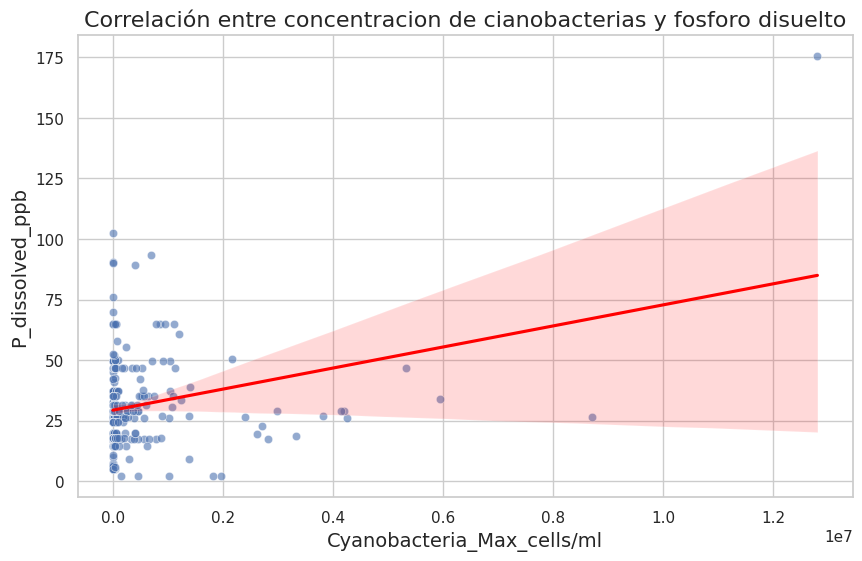

In [47]:
# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cyanobacteria_Max_cells/ml', y='P_dissolved_ppb', alpha=0.6)

# Agregar una línea de regresión
sns.regplot(data=df, x='Cyanobacteria_Max_cells/ml', y='P_dissolved_ppb', scatter=False, color='red')

# Etiquetas y título
plt.title('Correlación entre concentracion de cianobacterias y fosforo disuelto', fontsize=16)
plt.xlabel('Cyanobacteria_Max_cells/ml', fontsize=14)
plt.ylabel('P_dissolved_ppb', fontsize=14)

# Mostrar el gráfico
plt.show()

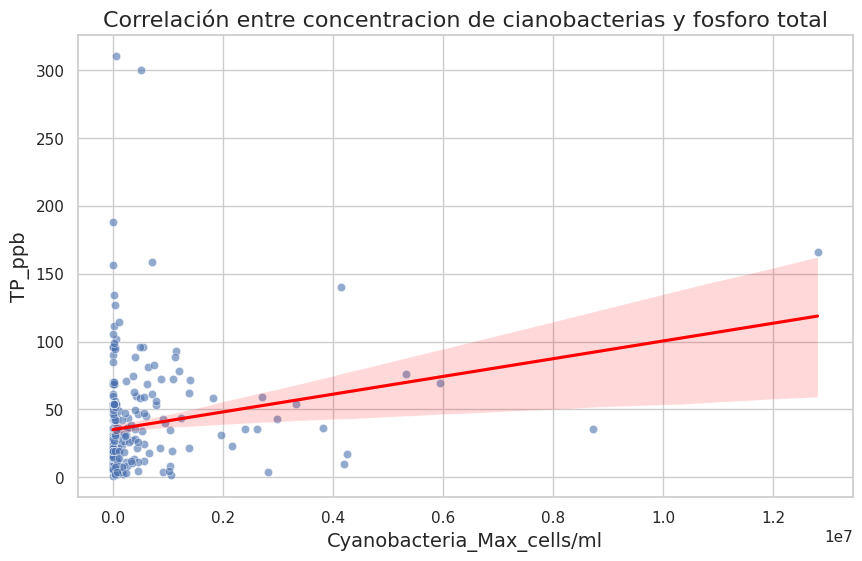

In [48]:
# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cyanobacteria_Max_cells/ml', y='TP_ppb', alpha=0.6)

# Agregar una línea de regresión
sns.regplot(data=df, x='Cyanobacteria_Max_cells/ml', y='TP_ppb', scatter=False, color='red')

# Etiquetas y título
plt.title('Correlación entre concentracion de cianobacterias y fosforo total', fontsize=16)
plt.xlabel('Cyanobacteria_Max_cells/ml', fontsize=14)
plt.ylabel('TP_ppb', fontsize=14)

# Mostrar el gráfico
plt.show()

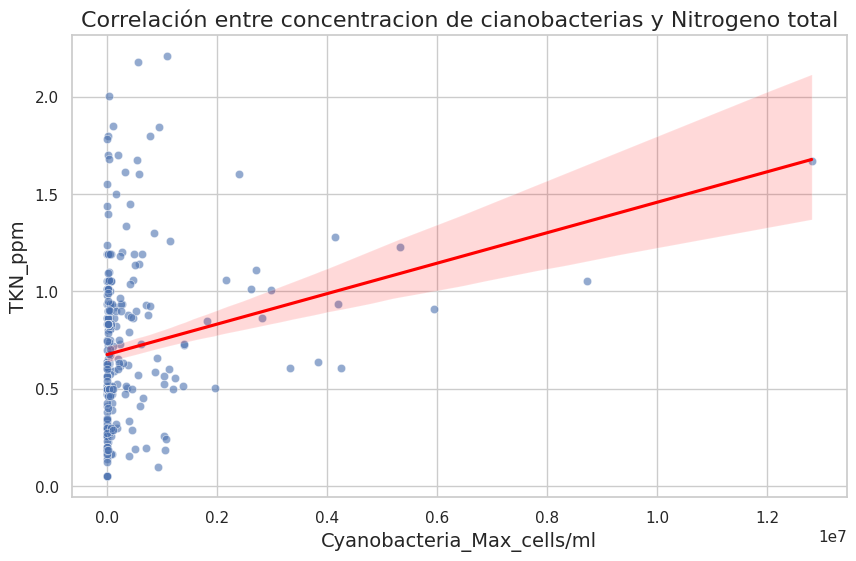

In [49]:
# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cyanobacteria_Max_cells/ml', y='TKN_ppm', alpha=0.6)

# Agregar una línea de regresión
sns.regplot(data=df, x='Cyanobacteria_Max_cells/ml', y='TKN_ppm', scatter=False, color='red')

# Etiquetas y título
plt.title('Correlación entre concentracion de cianobacterias y Nitrogeno total', fontsize=16)
plt.xlabel('Cyanobacteria_Max_cells/ml', fontsize=14)
plt.ylabel('TKN_ppm', fontsize=14)

# Mostrar el gráfico
plt.show()

## ¿Es más relevante la temperatura bajo el agua que en la superficie para el crecimiento de cianobacterias?

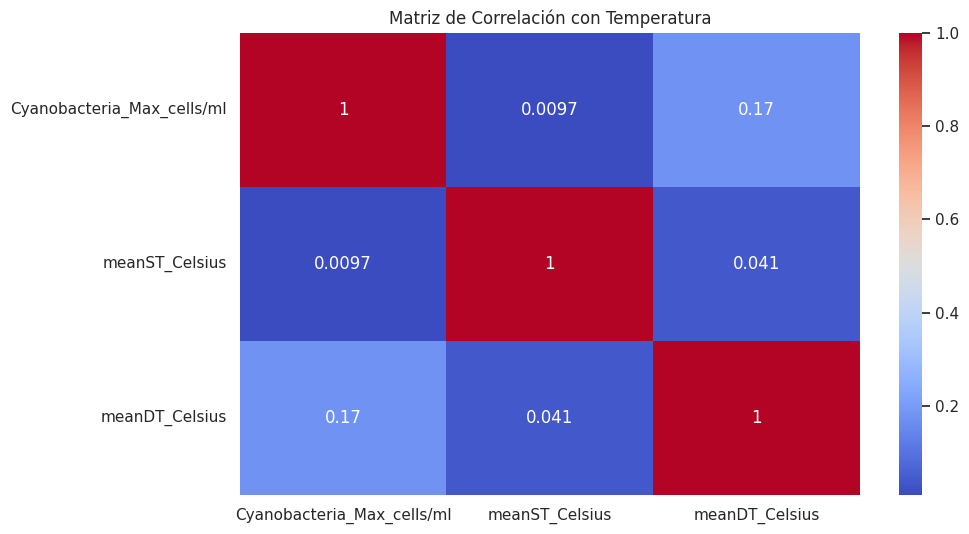

In [50]:
# Define las columnas que quieres incluir en la correlación
columnas_deseadas = ['Cyanobacteria_Max_cells/ml', 'meanST_Celsius', 'meanDT_Celsius']

# Filtra el DataFrame para incluir solo las columnas deseadas
df_filtrado = df[columnas_deseadas]

# Calcula la matriz de correlación solo para las columnas seleccionadas
corr = df_filtrado.corr()

# Visualiza la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación con Temperatura')
plt.show()

Se observa una correlación mayor con la temperatura bajo el agua (DT)

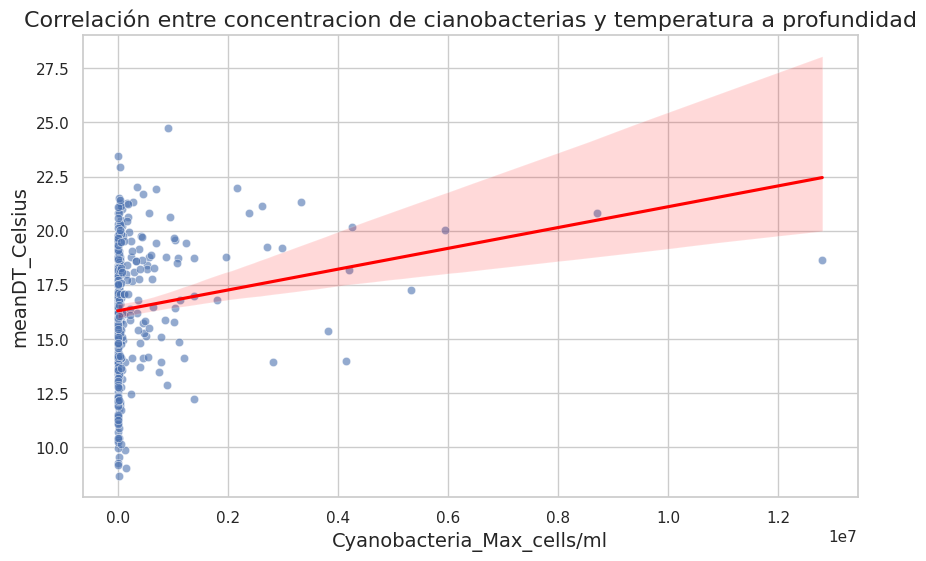

In [51]:
# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cyanobacteria_Max_cells/ml', y='meanDT_Celsius', alpha=0.6)

# Agregar una línea de regresión
sns.regplot(data=df, x='Cyanobacteria_Max_cells/ml', y='meanDT_Celsius', scatter=False, color='red')

# Etiquetas y título
plt.title('Correlación entre concentracion de cianobacterias y temperatura a profundidad', fontsize=16)
plt.xlabel('Cyanobacteria_Max_cells/ml', fontsize=14)
plt.ylabel('meanDT_Celsius', fontsize=14)

# Mostrar el gráfico
plt.show()